In [234]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# libraries used in problem 1
import math
import sklearn
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# libraries used in problem 2
import nltk
import string
import re

In [235]:
# version of libraries used
print(f'version of numpy used: {np.__version__}')
print(f'version of pandas used: {pd.__version__}')
print(f'version of matplotlib used: {matplotlib.__version__}')
print(f'version of seaborn used: {sns.__version__}')
print(f'version of sklearn used: {sklearn.__version__}')
print(f'version of nltk used: {nltk.__version__}')

version of numpy used: 1.24.3
version of pandas used: 2.0.3
version of matplotlib used: 3.7.2
version of seaborn used: 0.12.2
version of sklearn used: 1.5.0
version of nltk used: 3.8.1


# Problem 1
## Background Information
In the news media industry, providing insightful election coverage is critical for attracting and retaining viewership. To achieve this, data-driven analysis is essential. CNBE News, a prominent news channel, has conducted a comprehensive survey capturing the perspectives of 1,525 voters across various demographic and socio-economic factors. Using this data, they aim to forecast which political party a voter is likely to support. This analysis will serve as the foundation for creating an exit poll that can accurately predict the overall election outcomes.
## Business Context
Exit polls are integral to election coverage, as accurate predictions can significantly benefit a news channel. With this in mind, CNBE News, a prominent news channel, aims to build a predictive model to forecast which political party a voter is likely to support. They will use survey data that captures voter perspectives across various demographic and socio-economic factors.
## Problem Statement
The objective of this project is to conduct a comprehensive analysis of survey data that captures voter perspectives to identify the key factors influencing voter support for political parties. By utilizing various machine learning techniques, the goal is to build a classification model that can accurately predict election outcomes for exit poll purposes. Additionally, identifying these key factors will enhance the quality of data collected during surveys by focusing on important features, ultimately improving the predictive model's accuracy.
## Data Dictionary
1. vote: Party choice: Conservative or Labour
2. age: in years
3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.
4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.
5. Blair: Assessment of the Labour leader, 1 to 5.
6. Hague: Assessment of the Conservative leader, 1 to 5.
7. Europe: an 11-point scale that measures respondents' attitudes toward European integration.   High scores represent ‘Eurosceptic’ sentiment.
8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
9. gender: female or male.
## Uploading Data

In [236]:
election_data = pd.read_excel('D:\\Kartik\\GL MDS\\Study_data\\Assingnment_files\\Module_5_ML2\\Election_Data.xlsx',
                              sheet_name='Election_Dataset_Two Classes')

## Data Overview

In [237]:
def data_overview(df):
    print("a glimpse of the data")
    print("----------------------------------------------------------------------------")
    display(df.head())
    print("\n")
    
    print("shape of the dataset")
    print("----------------------------------------------------------------------------")
    display(df.shape)
    print("\n")
    
    print("statistical summary")
    print("----------------------------------------------------------------------------")
    display(df.describe().T)
    print("\n")
    
    print("information of features")
    print("----------------------------------------------------------------------------")
    display(df.info())
    print("\n")
    
    print("missing values")
    print("----------------------------------------------------------------------------")
    display(df.isnull().sum())
    print("\n")
    
    print("checking for duplicates")
    print("----------------------------------------------------------------------------")
    print(f"number of dupliacte rows: {df.duplicated().sum()}")
    print("\n")
    
    object_columns = df.select_dtypes(include='object').columns #identify columns with object data type
    for column in object_columns:
        print("value counts for " + column)
        print("----------------------------------------------------------------------------")
        print(df[column].value_counts())
        print("\n")

In [238]:
data_overview(election_data)

a glimpse of the data
----------------------------------------------------------------------------


,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male




shape of the dataset
----------------------------------------------------------------------------


(1525, 10)



statistical summary
----------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0




information of features
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


None



missing values
----------------------------------------------------------------------------


Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64



checking for duplicates
----------------------------------------------------------------------------
number of dupliacte rows: 0


value counts for vote
----------------------------------------------------------------------------
vote
Labour          1063
Conservative     462
Name: count, dtype: int64


value counts for gender
----------------------------------------------------------------------------
gender
female    812
male      713
Name: count, dtype: int64




#### Key Observations
1. Datset has 1525 rows and 10 columns, out of these columns, first column 'Unnamed: 0' contains index numbers which are irrelavent for us, we will drop this column during pre-processing stage.
2. Dataset has 9 relevant attributes out of which 7 have numeric data and 2 have object type. In the data, attribute 'vote' is the target label, additionally, feature names have inconsistency in the nomenclature as for some features first character is in upper case while for few it is in lower case we will convert the first character to upper case for all features.
3. From the statistical summary of numeric columns we can conclude that there are no anomalies in data. Except for age all the other features are ordinal categoric in nature, we will convert them to categoric datatype from numeric during at the time of encoding.
4. Datatype for all features are as per our expectation and there are no missing values or duplicates in the data.
5. In the dataset 1063 people have voted for Labour party while only 462 have voted for conservative party which means that data is skewed, however, since the minority class accounts for over 30% in the data we will consider it balanced for our project. 
## Data Pre-processing
### Dropping irrelevant column

In [239]:
# dropping 'Unnamed: 0' column
election_data = election_data.drop('Unnamed: 0', axis= 1)
election_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


### Renaming attributes

In [240]:
# renaming columns inorder to ensure consistency in attribute name
election_data = election_data.rename(columns={'vote':'Vote', 'age':'Age', 'economic.cond.national':'Economic.cond.national',
                                              'economic.cond.household':'Economic.cond.household', 
                                              'political.knowledge':'Political.knowledge', 'gender':'Gender'})

In [241]:
# displaying column names to ensure names are consistent
election_data.columns

Index(['Vote', 'Age', 'Economic.cond.national', 'Economic.cond.household',
       'Blair', 'Hague', 'Europe', 'Political.knowledge', 'Gender'],
      dtype='object')

## Exploratory Data Analysis
### Univariate Analysis
#### For Numeric Columns

Skewness of Age:  0.14462077228942483
Distribution of Age
----------------------------------------------------------------------------


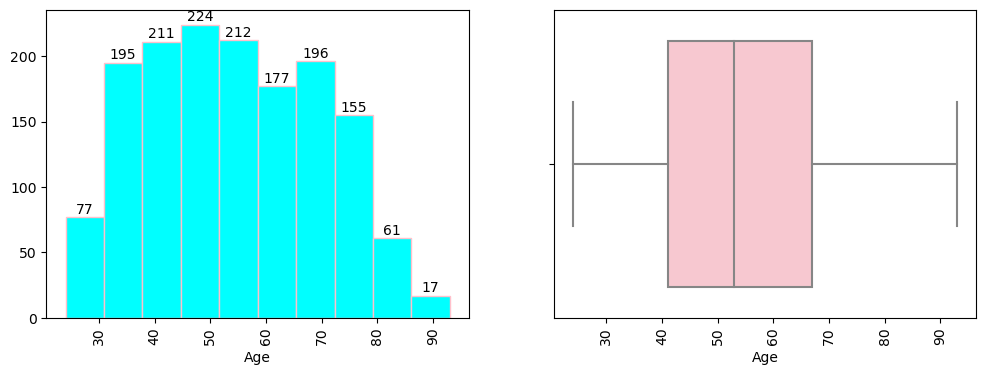

Skewness of Economic.cond.national:  -0.2404528899412957
Distribution of Economic.cond.national
----------------------------------------------------------------------------


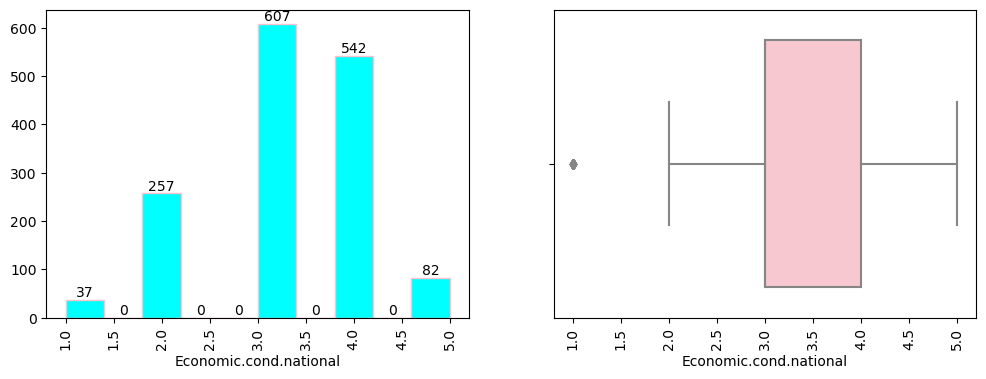

Skewness of Economic.cond.household:  -0.14955204997804528
Distribution of Economic.cond.household
----------------------------------------------------------------------------


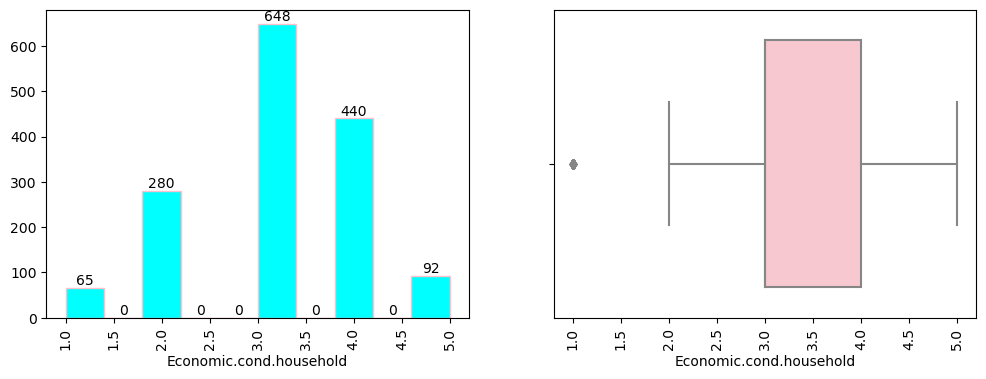

Skewness of Blair:  -0.5354186518673825
Distribution of Blair
----------------------------------------------------------------------------


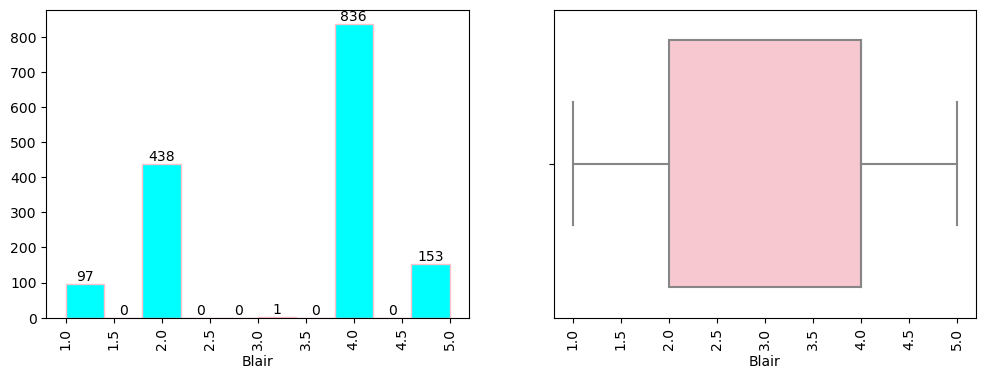

Skewness of Hague:  0.1520996272526911
Distribution of Hague
----------------------------------------------------------------------------


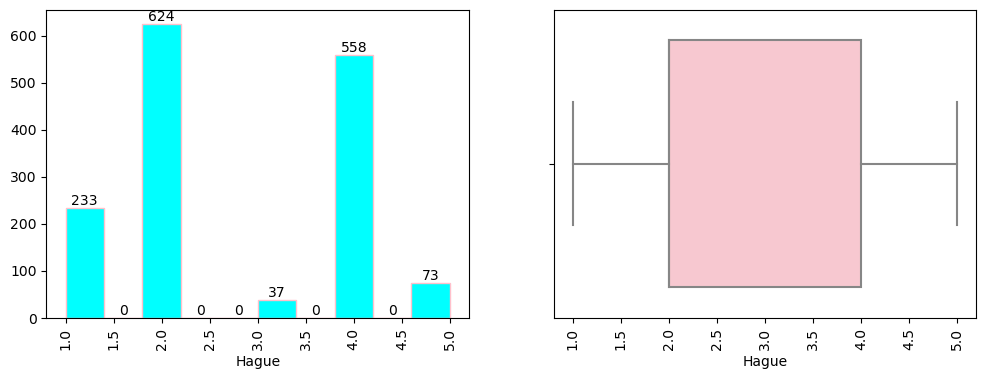

Skewness of Europe:  -0.13594670991422228
Distribution of Europe
----------------------------------------------------------------------------


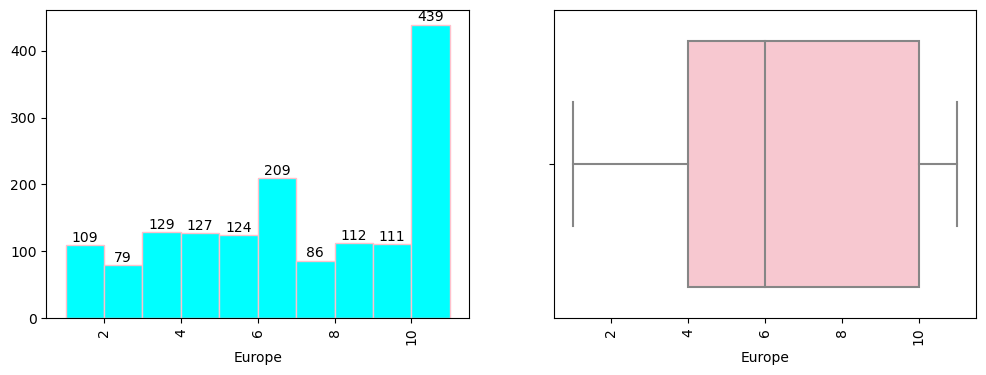

Skewness of Political.knowledge:  -0.42683782344871657
Distribution of Political.knowledge
----------------------------------------------------------------------------


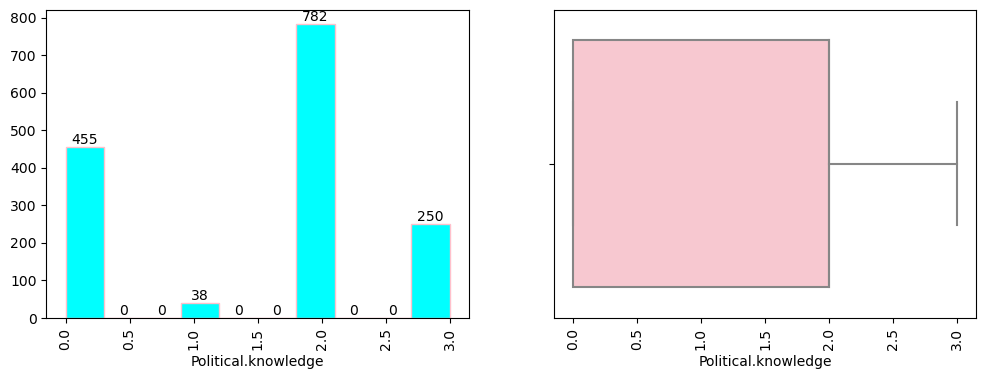

In [242]:
#defining a function for univariate analysis of numeric columns
def univariateAnalysis_numeric(df,column):
    print(f'Skewness of {column}: ', df[column].skew())
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")

    # Calculate min and max values for the column
    a = round(df[column].min())
    b = round(df[column].max())
    # Plot histogram with annotations
    freq, bins, patches = axs[0].hist(df[column], range=[a, b], edgecolor='pink', color='cyan')
    bin_centers = np.diff(bins) * 0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
        height = int(freq[n])
        axs[0].annotate("{}".format(height),
                    xy=(x, height),  # top left corner of the histogram bar
                    xytext=(0, 0.2),  # offsetting label position above its bar
                    textcoords="offset points",  # Offset (in points) from the *xy* value
                    ha='center', va='bottom')
        n = n + 1
    axs[0].set_xlabel(column)
    axs[0].tick_params(axis='x', labelrotation=90)
        
    # Plot boxplot
    sns.boxplot(x=column, data=df, ax=axs[1], color = 'pink')
    axs[1].tick_params(axis='x', labelrotation=90)

    # Show the plots
    plt.show()

# calling the function for univariate analysis
for column in election_data.select_dtypes(include='number').columns:
    univariateAnalysis_numeric(election_data, column)

#### Key Observations
1. Data in 'Age' attribute is normally distributed, there are no outliers in it which means that outlier treatment is not required since other numeric attributes are categorical in nature.
2. As per the demographic information, most respondents covered are aged between 30 and 80 years, meaning our data sample covers largely middle aged or senior citizens.
3. Most respondents have given 3 or 4 rating for national and their own household economic condition which means they believe that national as well as their own household economic condition is anywhere between average and good.
4. For attributes 'Blair' and 'Hague' almost all ratings are either 1, 2 or 4, 5, where these ratings represent how each respondents percieve the candidates belonging to both the parties with ratings of 4 and 5 means they have favourable view of that candidate and conversely ratings of 1 and 2 means they have unfavourable view. Here when we check the rating count for both the candidates we can infer that almost 1000 respondents have favourable view for the Labour party leader Tony Blair and over 600 respondents have favourable view for Conservative party leader William Hague, as per value count of 'Vote' attribute, for 1063 repondents, their party of choice is Labour party and for 462 it is Conservative party. All these attributes are showing similar trends meaning attributes 'Blair' and 'Hague' might be highly correlated to each other as well as target label 'Vote'.
5. Most respodents have rated in excess of of 6 for attribute 'Europe' which means that most of them are strongly against UK becoming part of the European Union.
6. While most respondents have moderate or high level of knowledge on stance of political parties on European integration, there are significant number of respondents who do not have any knowledge in this matter. 

#### For Categorical Columns

In [243]:
# defining the function
def univariateAnalysis_category(df, cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df[cat_column].value_counts())
    plt.figure()
    plt.figure(figsize=(6, 4))
    plots = df[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    for bar in plots.patches:
        plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    plt.show()
    print("       ")

Details of Vote
----------------------------------------------------------------
Vote
Labour          1063
Conservative     462
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

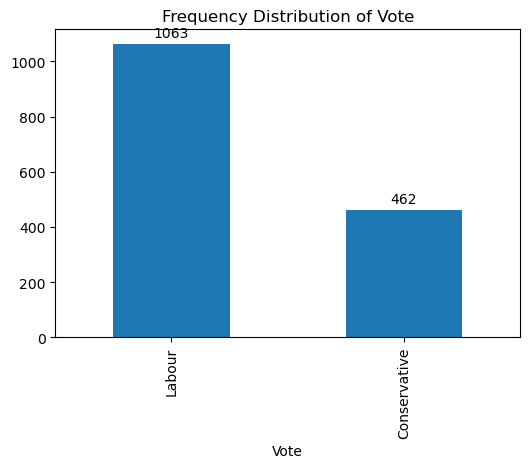

       
Details of Gender
----------------------------------------------------------------
Gender
female    812
male      713
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

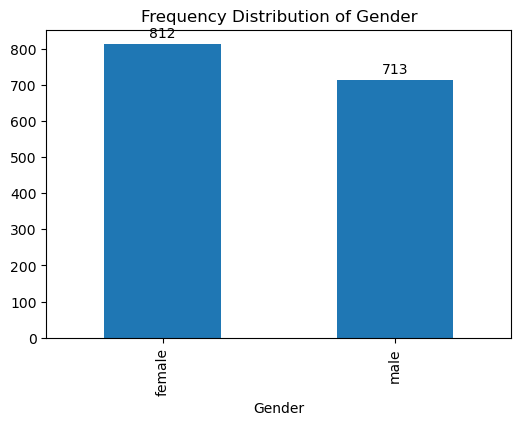

In [244]:
# calling the function
for column in election_data.select_dtypes(exclude= 'number'):
    univariateAnalysis_category(election_data, column)

#### Key Observations
1. Over two third of respondents in our survey prefer Labour party over Conservative party.
2. On gender basis, female respondents are higher than male respondents.
### Bivariate Analysis
#### Between numeric features

pair plot


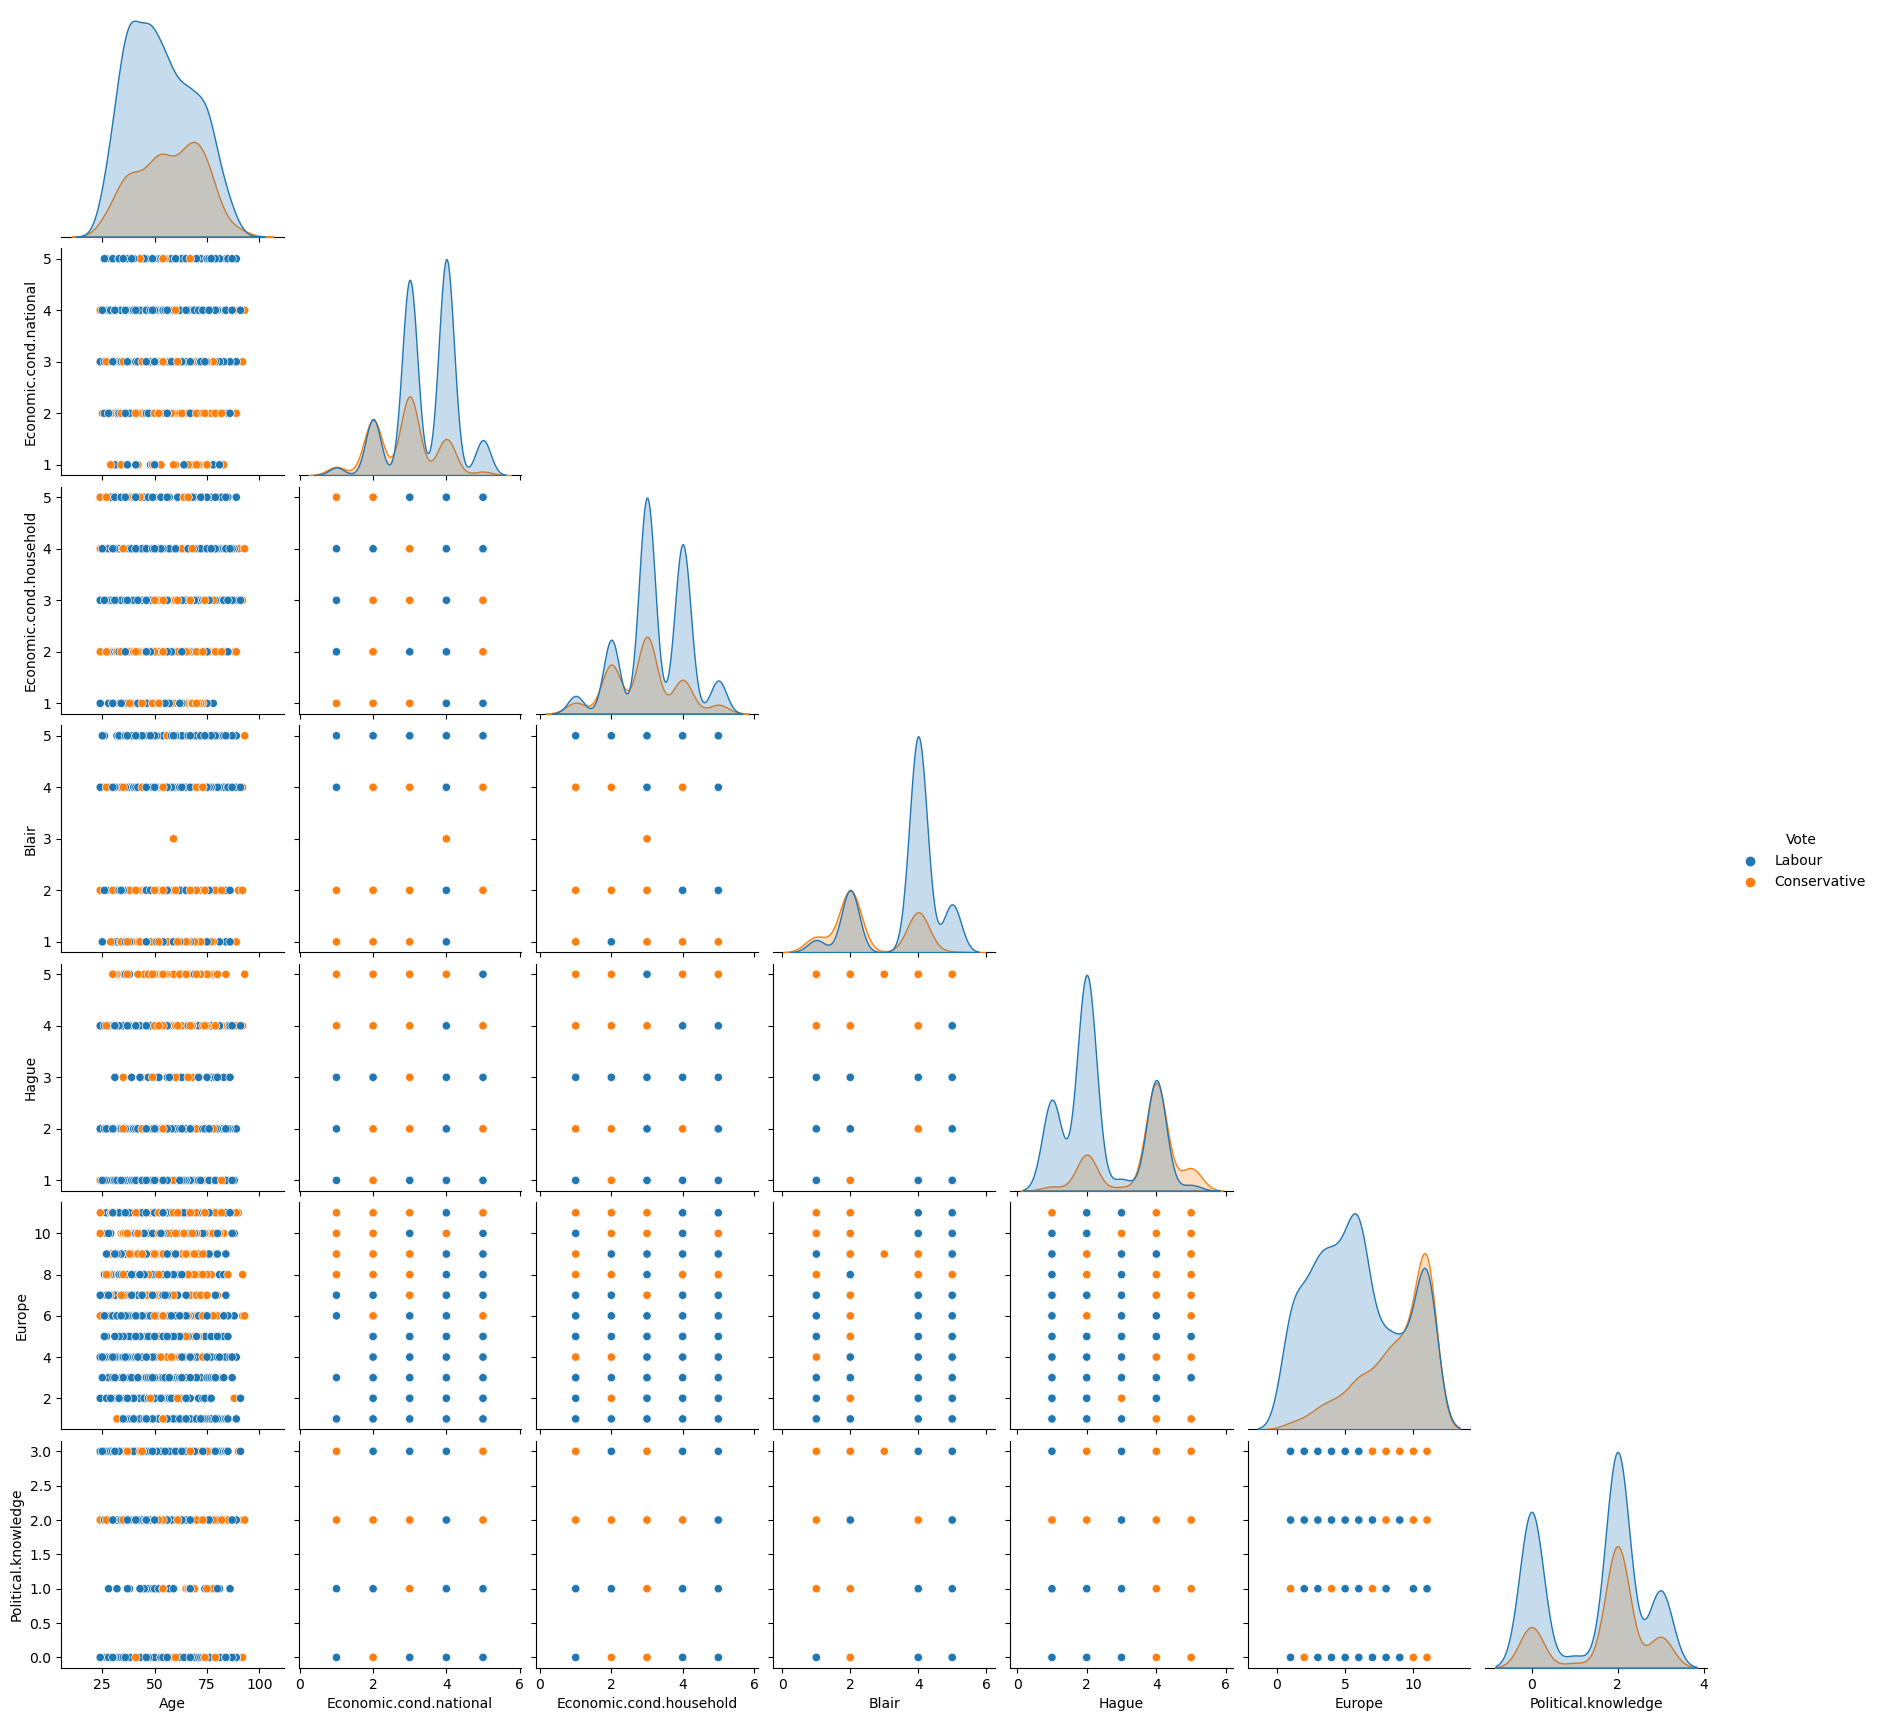

In [245]:
# pairplot
print('pair plot') 
sns.pairplot(data = election_data, corner = True, diag_kind='kde', hue='Vote')
plt.show()

heatmap


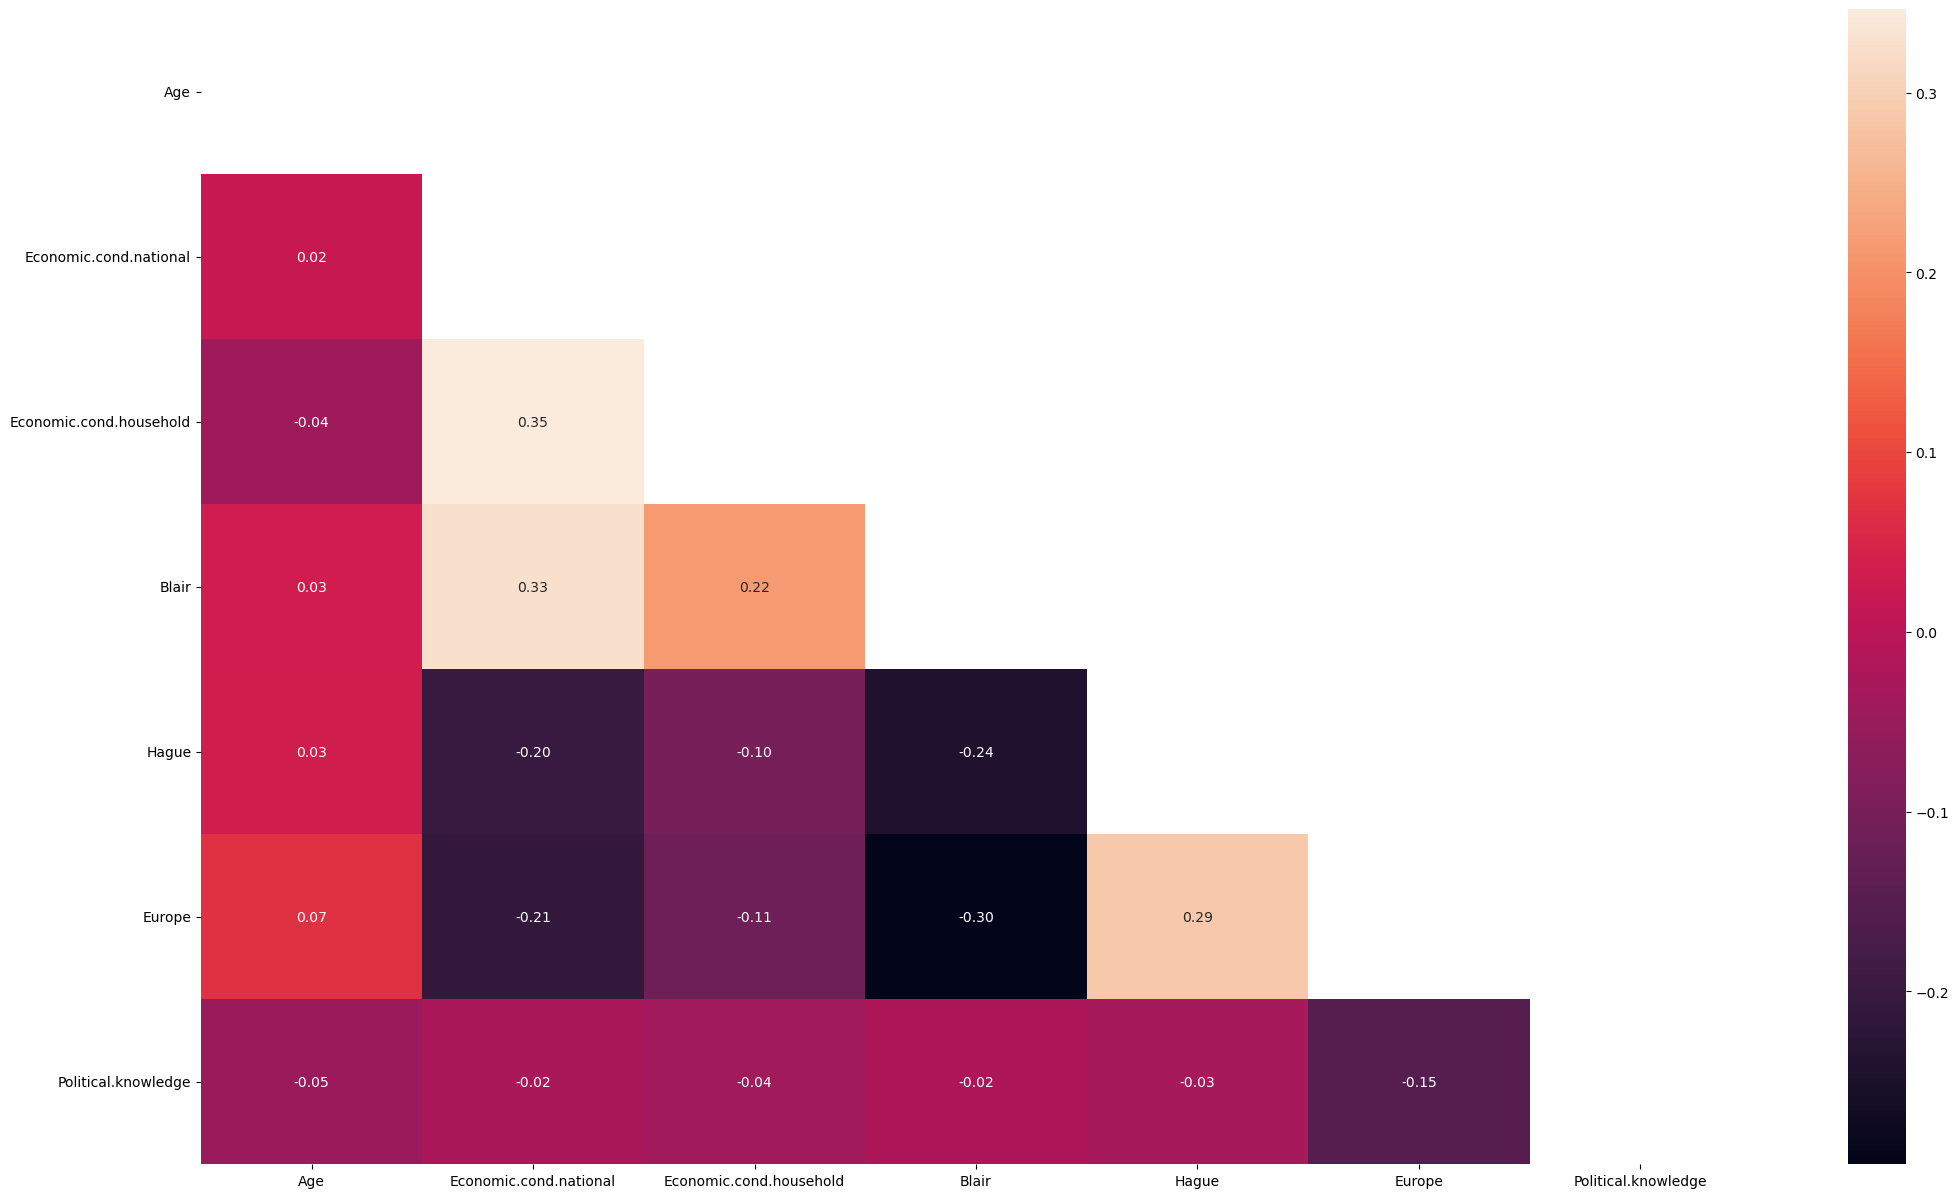

In [246]:
# heatmap
print('heatmap')
corr = election_data.select_dtypes(include='number').corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(election_data.select_dtypes(include='number').corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

#### Key Observations
1. From the pairplot we can conclude that distribution for both the class labels overlap for all the features which means that these features are weak predictors.
2. There is no significant correlation between the numeric attributes.
#### Between categorical and numeric attributes

In [247]:
# defining the function
def num_cat_bivariate(df, cat_col, numeric_columns):
    # Determine the number of rows and columns needed for subplots
    num_plots = len(numeric_columns)
    num_cols = min(3, num_plots)
    num_rows = math.ceil(num_plots / num_cols)

    # Create subplots
    plt.figure(figsize=(15, num_rows * 4))

    # Plot violin plots for each numeric column
    for i, num_col in enumerate(numeric_columns):
        if i < num_plots:  # Check if we haven't exceeded the number of numeric columns
            plt.subplot(num_rows, num_cols, i+1)
            sns.violinplot(x=cat_col, y=num_col, data=df)
            plt.title(f'{num_col} vs {cat_col}')
            plt.xticks(rotation=90)  # Rotate x-axis tick labels

    # Adjust layout
    plt.tight_layout()
    plt.show()

bivariate analysis for Vote


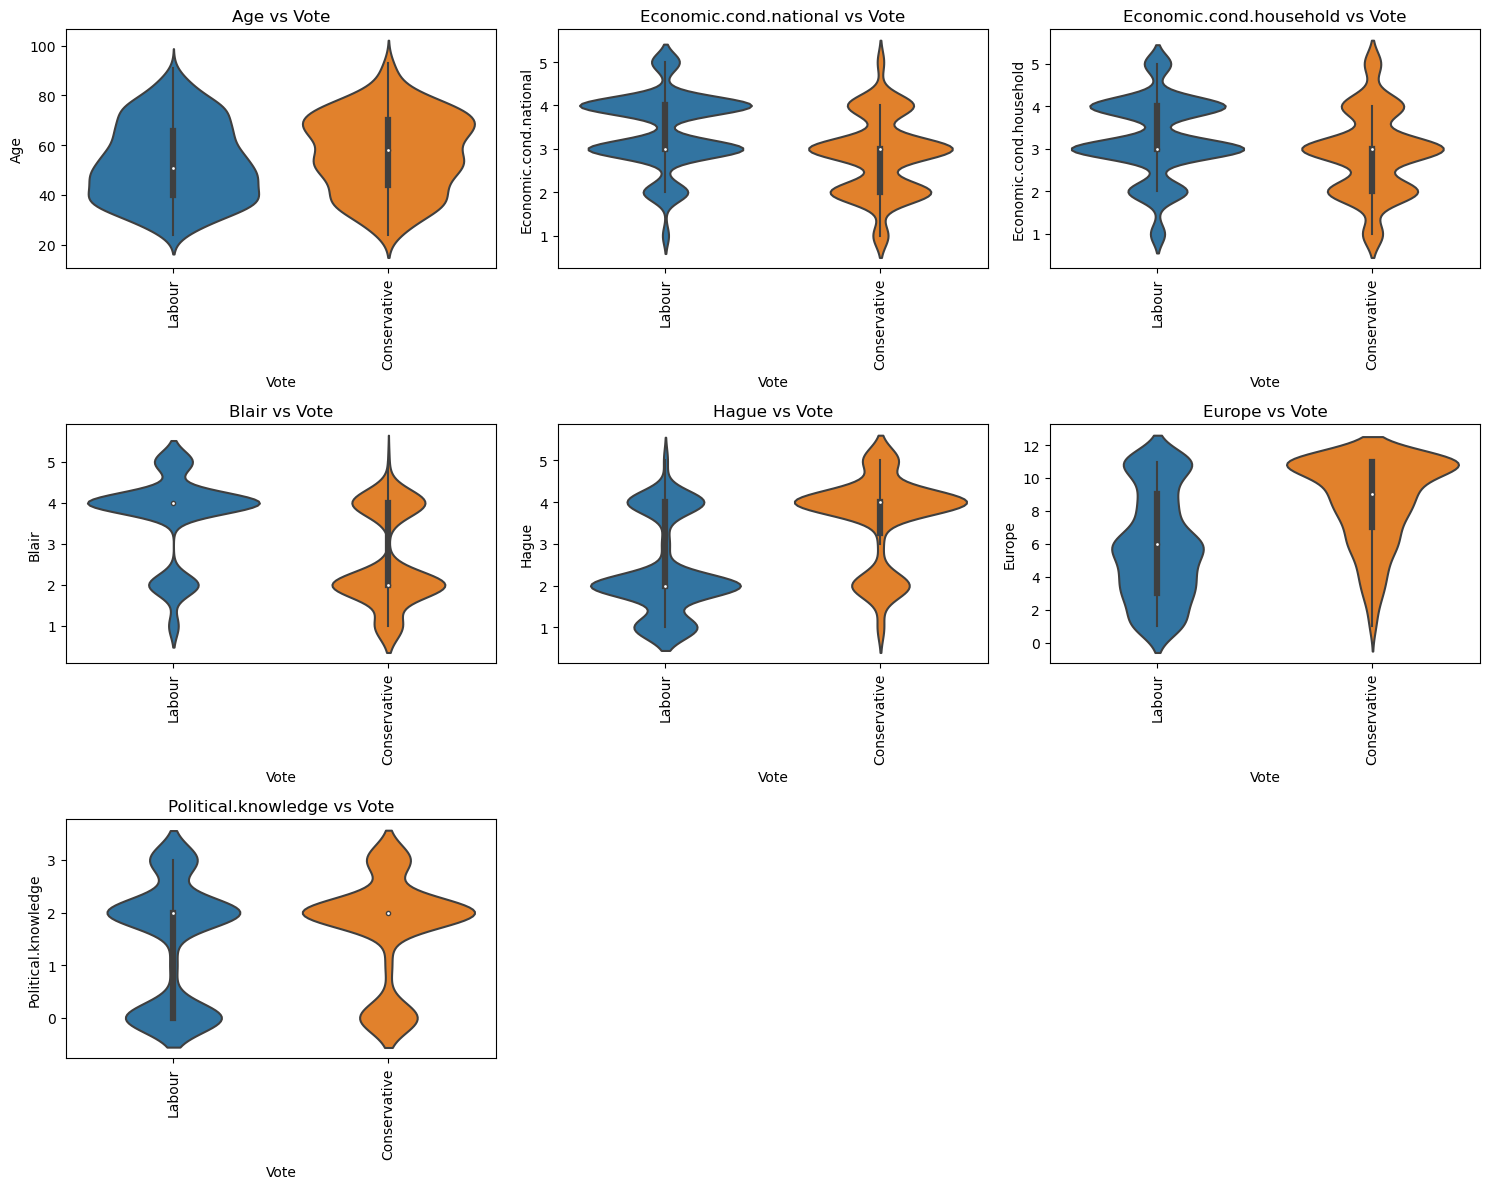



bivariate analysis for Gender


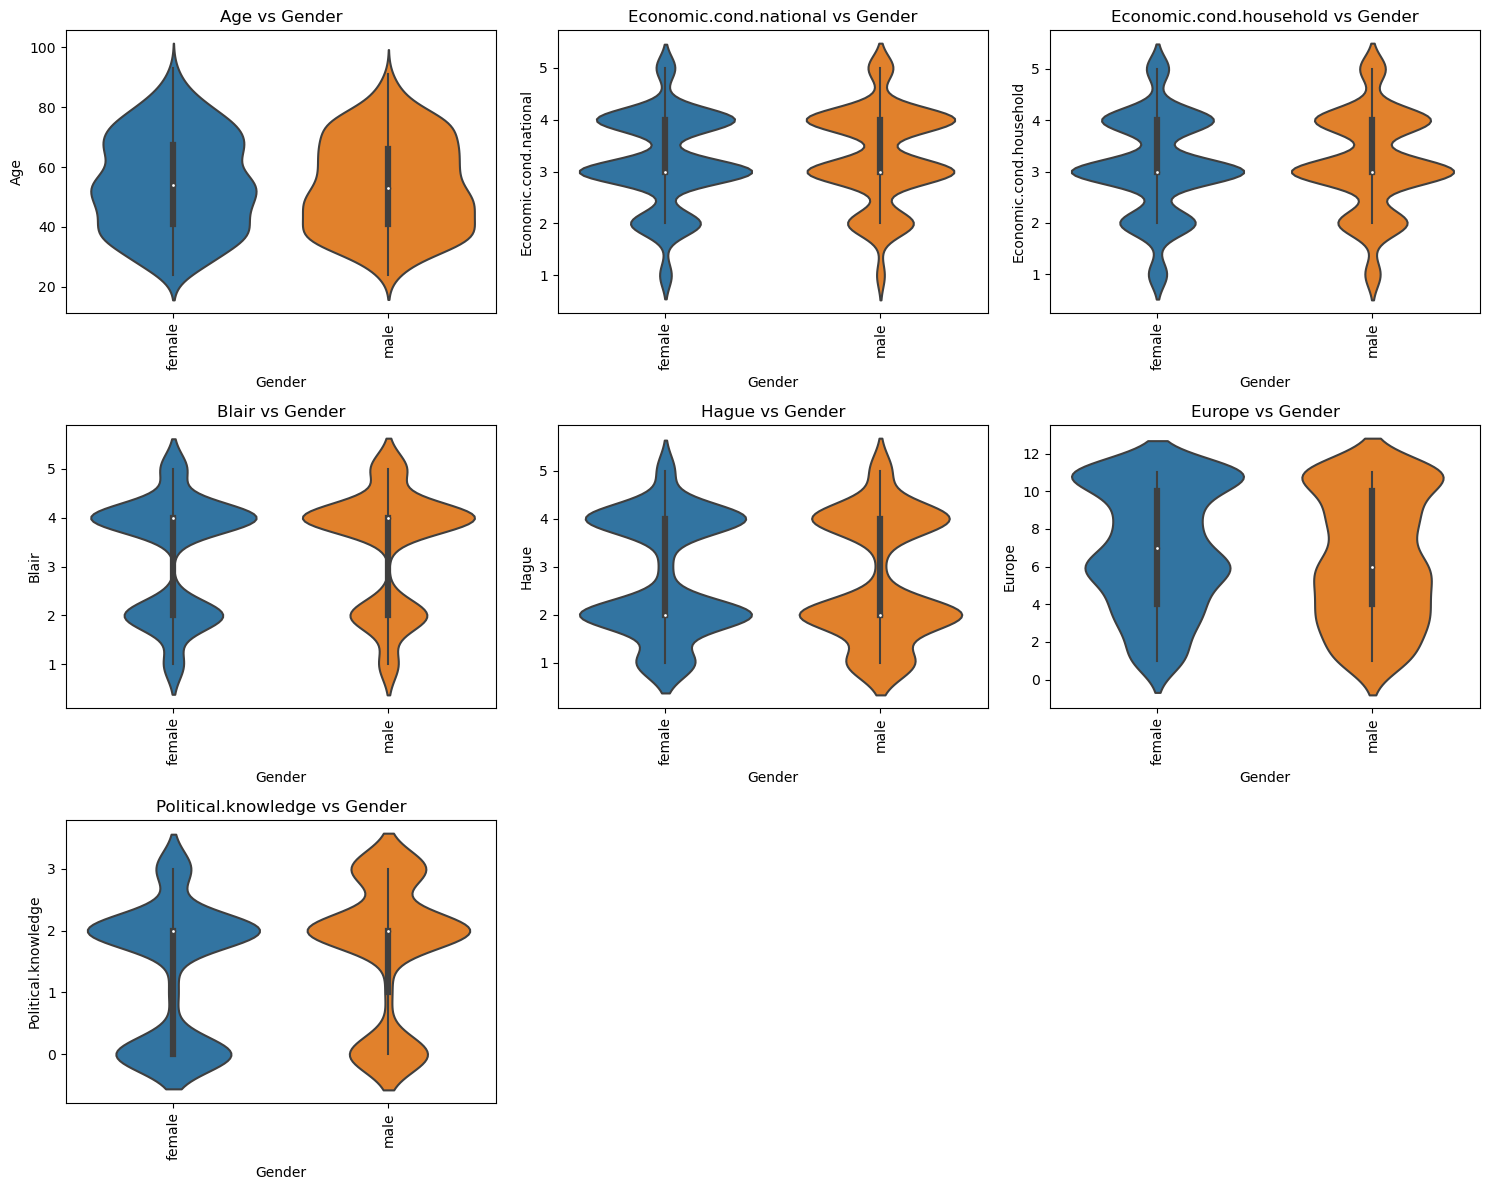

In [248]:
# calling the function
for cat_col in election_data.select_dtypes(include='object').columns:
    print(f'bivariate analysis for {cat_col}')
    num_cat_bivariate(election_data,cat_col, election_data.select_dtypes(include='number').columns)
    print('\n')

#### Key Observations
1. From the bivariate analysis of target label 'Vote' with all the numeric attributes we can infer:
* Younger respondents prefer Labour party more while older respondents prefer Conservative party.
* As we had anticipated earlier that attributes 'Blair' and 'Hague' might have cofrreclation with 'Vote', from the plot we can comprehend that our hypothesis was correct as respondents who have given higher ratings to Tony Blair are more likely to Labour party and vice versa for conservative party.
* Another key differentiator is 'Europe' where people who have stronger Eurosceptic sentiments are more likely to vote for Conservative party and those less averse to Europe integration, Labour party.
2. In bivariate analysis of 'Gender' with numeric features, while the preference for both male and famale are similar for all the attributes there is variance in case of 'Europe' where from the plot we can conslude that male are comparatively less averse to Europe integration.

## Data Encoding
#### Datatype conversion
We will convert the numeric ordinal features to category type while keeping their order intact.

In [249]:
cols = ['Economic.cond.national', 'Economic.cond.household','Blair', 'Hague', 'Europe', 'Political.knowledge']
for col in cols:
    election_data[col] = election_data[col].astype('category').cat.as_ordered()
election_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Vote                     1525 non-null   object  
 1   Age                      1525 non-null   int64   
 2   Economic.cond.national   1525 non-null   category
 3   Economic.cond.household  1525 non-null   category
 4   Blair                    1525 non-null   category
 5   Hague                    1525 non-null   category
 6   Europe                   1525 non-null   category
 7   Political.knowledge      1525 non-null   category
 8   Gender                   1525 non-null   object  
dtypes: category(6), int64(1), object(2)
memory usage: 46.2+ KB


#### Data Encoding
Converting data for features with object data using Label Encoder

In [250]:
# creating a copy of dataset for encoding
election_dataV1 = election_data.copy()

In [251]:
## Converting the 'Vote' and 'Gender' variables into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
election_dataV1['Vote'] = LE.fit_transform(election_dataV1['Vote'])
election_dataV1['Gender'] = LE.fit_transform(election_dataV1['Gender'])
election_dataV1.head()

,Vote,Age,Economic.cond.national,Economic.cond.household,Blair,Hague,Europe,Political.knowledge,Gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


## Data Spliting
Segregating independent and dependent labels and splitting data into train and test set.

In [252]:
# splitting independent and dependent variables
X = election_dataV1.drop('Vote', axis = 1)
Y = election_dataV1['Vote']

In [253]:
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
X_train.head()

,Age,Economic.cond.national,Economic.cond.household,Blair,Hague,Europe,Political.knowledge,Gender
1372,74,4,4,4,2,2,2,1
126,46,4,3,4,4,2,2,1
327,77,3,3,2,4,9,2,1
292,51,3,3,4,2,6,1,0
1058,37,3,4,4,2,8,0,0


In [254]:
# test data overview
X_test.head()

,Age,Economic.cond.national,Economic.cond.household,Blair,Hague,Europe,Political.knowledge,Gender
782,35,4,4,5,2,6,2,1
76,42,4,3,4,2,4,2,0
1009,32,4,3,4,2,4,1,0
1403,48,3,3,2,4,2,2,0
846,35,3,4,2,1,11,2,0


In [255]:
# checking for proportion of both the labels in target label
y_train.value_counts(1)

Vote
1    0.691659
0    0.308341
Name: proportion, dtype: float64

In [256]:
# checking for proportion of both the labels in target label
y_test.value_counts(1)

Vote
1    0.709607
0    0.290393
Name: proportion, dtype: float64

## Classification Modelling
We will build models using different classification techniques namely Naive Bayes and KNN and then we will try to improve the model performance using different ensemble techniques. We will compare different model performances using their AUC (Area Under the ROC Curve) score. The AUC score is a robust measure for skewed data as it accounts for both the true positive rate and the false positive rate. It provides a single metric that summarizes the model’s ability to distinguish between classes across all thresholds. Additionally, plotting the ROC curve helps visually evaluate the model's discriminative power.

For evaluation of each model we will additionally be using classification table and confusion matrix as a classification report provides a detailed summary of key metrics like precision, recall, F1 score, and support for each class, helping to evaluate the performance of a model comprehensively. A confusion matrix offers a visual and numerical breakdown of true positives, false positives, true negatives, and false negatives, allowing for an in-depth understanding of the model's accuracy and error types.
#### Defining functions

In [257]:
# for auc score and auc-roc curve
def curve_roc(model, ind_data, target_data):
    # predict probabilities
    probs = model.predict_proba(ind_data)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(target_data, probs)
    print('AUC: %.3f' % auc)
    # calculate roc curve
    train_fpr, train_tpr, train_thresholds = roc_curve(target_data, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(train_fpr, train_tpr, label=f'ROC curve (area = {auc:.4f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()

In [258]:
# for confusion matrix and classification report
def classificaion_model_evaluator(model, ind_data,target_data, data_type):
    predicted_data = model.predict(ind_data)
    cm_train = confusion_matrix(target_data, predicted_data)
    display(cm_train)
    print('\n')

    # plotting confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix {data_type}')
    plt.show()
    print('\n')

    # display classification report
    print(f'Classification report {data_type}')
    print('--------------------------------------------------------------------')
    print(classification_report(target_data, predicted_data))

### Naive Bayes Model

In [259]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [260]:
# accuracy score for model
print('Model accuracy for train data')
print(NB_model.score(X_train, y_train))
print('\n Model accuracy for test data')
print(NB_model.score(X_test, y_test))

Model accuracy for train data
0.837863167760075

 Model accuracy for test data
0.8144104803493449


Accuracy score for both test and train data are almost identical which means we have a stable model.
#### Model Evaluation
##### Using AUC -ROC Method

for training data
AUC: 0.892


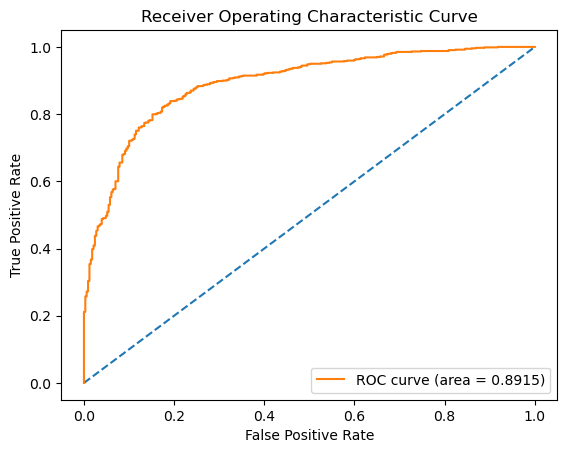

In [261]:
print('for training data')
curve_roc(NB_model, X_train, y_train)

for test data
AUC: 0.867


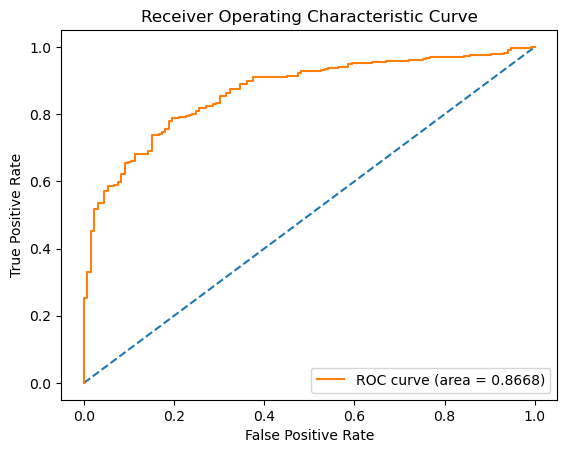

In [262]:
print('for test data')
curve_roc(NB_model, X_test, y_test)

##### Confusion Matrix

for training data
--------------------------------------------------------------------


array([[237,  92],
       [ 81, 657]], dtype=int64)

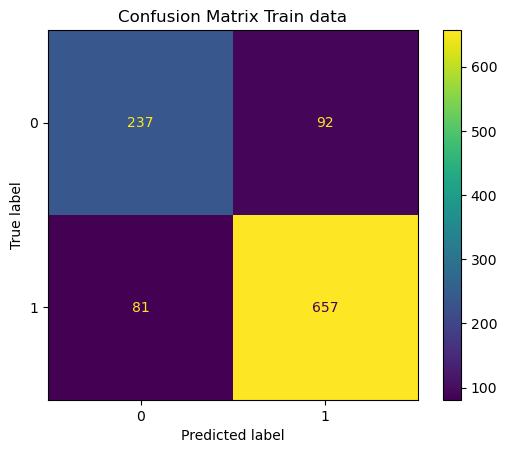



Classification report Train data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       329
           1       0.88      0.89      0.88       738

    accuracy                           0.84      1067
   macro avg       0.81      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [263]:
print('for training data')
print('--------------------------------------------------------------------')
classificaion_model_evaluator(NB_model, X_train, y_train, 'Train data')

for test data
--------------------------------------------------------------------


array([[ 87,  46],
       [ 39, 286]], dtype=int64)

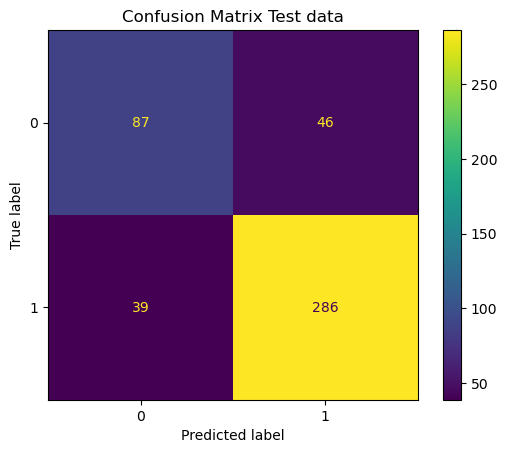



Classification report Test data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       133
           1       0.86      0.88      0.87       325

    accuracy                           0.81       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



In [264]:
print('for test data')
print('--------------------------------------------------------------------')
classificaion_model_evaluator(NB_model, X_test, y_test, 'Test data')

The naive bayes model has on test data an AUC score of 0.8668 meaning it has high performance and there is 86.68% chance that the model will correctly distingush a randomly choosen instance, however, f1-score for class 0 (Conservative party) is only 0.67 which means model is performing weakly when classifying for minority class. 
### KNN Model

In [265]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [266]:
# accuracy score for model
print('Model accuracy for train data')
print(knn_model.score(X_train, y_train))
print('\n Model accuracy for test data')
print(knn_model.score(X_test, y_test))

Model accuracy for train data
0.85941893158388

 Model accuracy for test data
0.7729257641921398


Accuracy score for both train and test are with range of 10% which means we have a stable model.
#### Model Evaluation
##### Using Auc-Roc Method

for training data
--------------------------------------------------------------------
AUC: 0.929


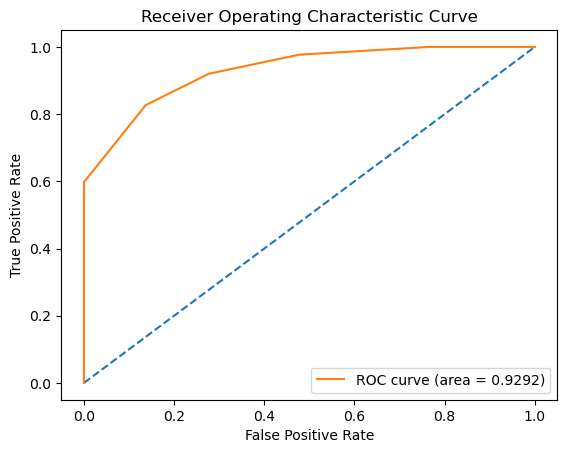

In [267]:
print('for training data')
print('--------------------------------------------------------------------')
curve_roc(knn_model, X_train, y_train)

for test data
--------------------------------------------------------------------
AUC: 0.832


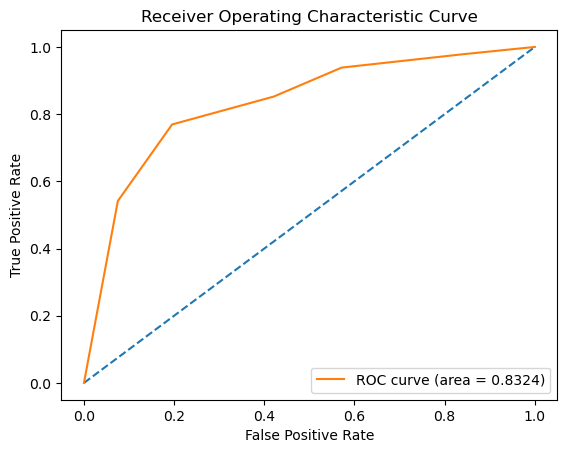

In [268]:
print('for test data')
print('--------------------------------------------------------------------')
curve_roc(knn_model, X_test, y_test)

##### Confusion Matrix

for training data
--------------------------------------------------------------------


array([[238,  91],
       [ 59, 679]], dtype=int64)

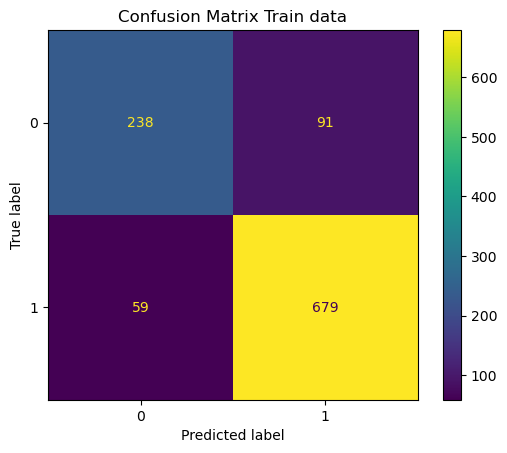



Classification report Train data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       329
           1       0.88      0.92      0.90       738

    accuracy                           0.86      1067
   macro avg       0.84      0.82      0.83      1067
weighted avg       0.86      0.86      0.86      1067



In [269]:
print('for training data')
print('--------------------------------------------------------------------')
classificaion_model_evaluator(knn_model, X_train, y_train, 'Train data')

for test data
--------------------------------------------------------------------


array([[ 87,  46],
       [ 39, 286]], dtype=int64)

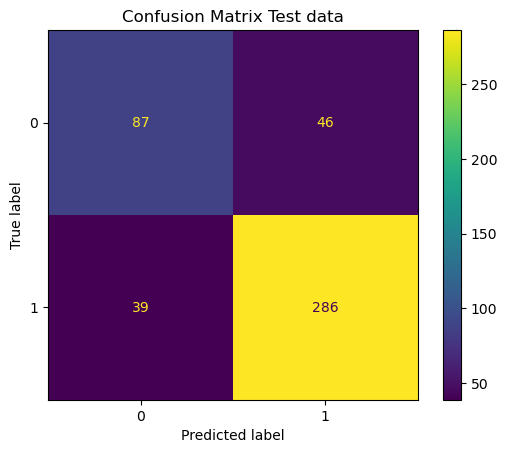



Classification report Test data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       133
           1       0.86      0.88      0.87       325

    accuracy                           0.81       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



In [270]:
print('for test data')
print('--------------------------------------------------------------------')
classificaion_model_evaluator(NB_model, X_test, y_test, 'Test data')

We have made models using Naive bayes and KNN method where model accuracy for Naive bayes on test data is 0.814 and AUC score is 0.867, for KNN these metrics values are 0.773 and 0.832 respectively. Based on these scores we can conclude that for now Naive bayes model is the best performing model, however, we will try to improve the model performance by using different ensemble techniques.
### Random Forest Model

In [271]:
rf_model =  RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [272]:
# accuracy score for model
print('Model accuracy for train data')
print(rf_model.score(X_train, y_train))
print('\n Model accuracy for test data')
print(rf_model.score(X_test, y_test))

Model accuracy for train data
0.9990627928772259

 Model accuracy for test data
0.8144104803493449


There is overfitting in the model which we will try to optimize using gridsearch

In [355]:
# defining best parameters
best_params = {'n_estimators':[300, 400,500],
              'max_features':[0.4,0.5,0.6],
              'max_depth':[3,5,7,9]}

# defining model
grid_search = GridSearchCV(estimator=rf_model, param_grid=best_params, cv= 3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=5, max_features=0.5,
                                              n_estimators=500,
                                              random_state=42),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'max_features': [0.4, 0.5, 0.6],
                         'n_estimators': [300, 400, 500]})

In [356]:
# getting best parameters
grid_search.best_params_

{'max_depth': 5, 'max_features': 0.5, 'n_estimators': 400}

Using the grid search we have got the best parameters which could reduce the overfitting in the model while maximizing its overall performance. We will again build the model using these parameters.

In [357]:
# building model using best parameters
rf_model = RandomForestClassifier(n_estimators=400, max_features=0.5, max_depth=5, random_state=42, )
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=0.5, n_estimators=400,
                       random_state=42)

In [358]:
# accuracy score for model
print('Model accuracy for train data')
print(rf_model.score(X_train, y_train))
print('\n Model accuracy for test data')
print(rf_model.score(X_test, y_test))

Model accuracy for train data
0.8809746954076851

 Model accuracy for test data
0.8209606986899564


By pruning the tree and finding best parameters we have been able to overcome the overfitting in the tree while improving the model performance.
#### Model Evaluation
##### AUC-ROC Curve

for training data
--------------------------------------------------------------------
AUC: 0.941


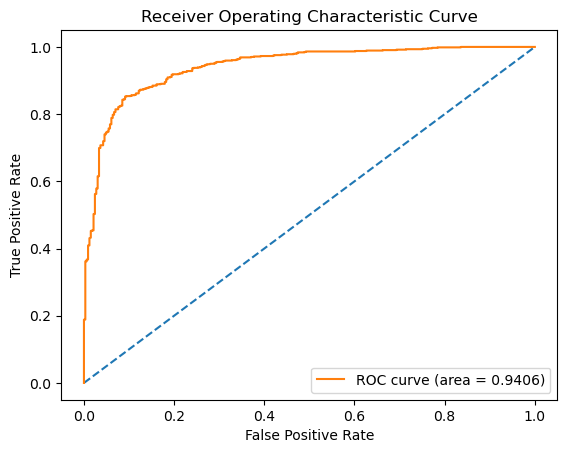

In [359]:
print('for training data')
print('--------------------------------------------------------------------')
curve_roc(rf_model, X_train, y_train)

for test data
--------------------------------------------------------------------
AUC: 0.884


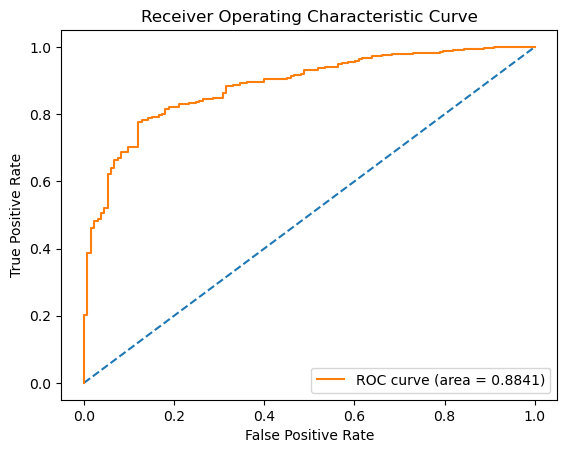

In [360]:
print('for test data')
print('--------------------------------------------------------------------')
curve_roc(rf_model, X_test, y_test)

##### Confusion Matrix

for train data
--------------------------------------------------------------------


array([[250,  79],
       [ 48, 690]], dtype=int64)

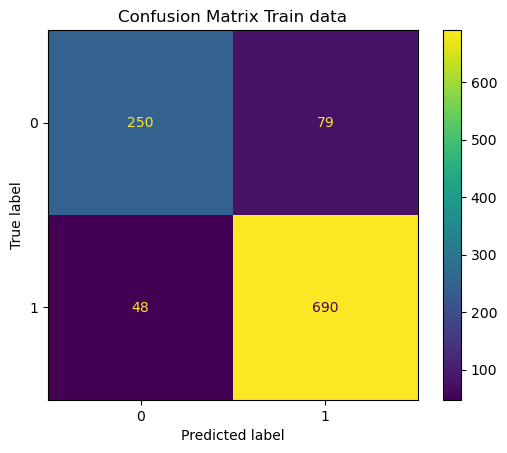



Classification report Train data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       329
           1       0.90      0.93      0.92       738

    accuracy                           0.88      1067
   macro avg       0.87      0.85      0.86      1067
weighted avg       0.88      0.88      0.88      1067



In [361]:
print('for train data')
print('--------------------------------------------------------------------')
classificaion_model_evaluator(rf_model, X_train, y_train, 'Train data')

for test data
--------------------------------------------------------------------


array([[ 88,  45],
       [ 37, 288]], dtype=int64)

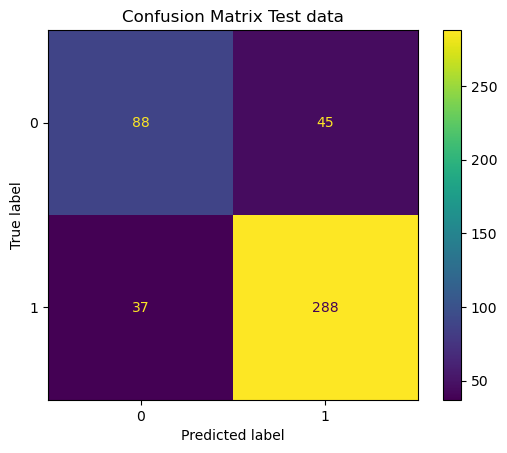



Classification report Test data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       133
           1       0.86      0.89      0.88       325

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [362]:
print('for test data')
print('--------------------------------------------------------------------')
classificaion_model_evaluator(rf_model, X_test, y_test, 'Test data')

Final random forest model has on test data an AUC score of 0.884 meaning it has high performance and there is 88.4% chance that the model will correctly distingush a randomly choosen instance and f1-score for class 0 (Conservative party) is 0.68 which though still is poor when classifying for minority class there is a slight improvement when compared to that of Naive Bayes. 

### Bagging

In [281]:
bg_model = BaggingClassifier(random_state=42)
bg_model.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [282]:
# accuracy score for model
print('Model accuracy for train data')
print(bg_model.score(X_train, y_train))
print('\n Model accuracy for test data')
print(bg_model.score(X_test, y_test))

Model accuracy for train data
0.9878163074039362

 Model accuracy for test data
0.8100436681222707


There is overfitting in the model which we will try to optimize using gridsearch

In [283]:
# defining best parameters
best_params = {'n_estimators':[2000, 3000, 4000],
              'max_features':[0.4,0.5,0.6],
              'max_samples':[0.6,0.7,0.8]}

# defining model
grid_search = GridSearchCV(estimator=bg_model, param_grid=best_params, cv= 3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=BaggingClassifier(random_state=42),
             param_grid={'max_features': [0.4, 0.5, 0.6],
                         'max_samples': [0.6, 0.7, 0.8],
                         'n_estimators': [2000, 3000, 4000]})

In [284]:
grid_search.best_params_

{'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 3000}

Using the grid search we have got the best parameters which could reduce the overfitting in the model while maximizing its overall performance. We will again build the model using these parameters.

In [285]:
bg_model=BaggingClassifier(n_estimators=3000, max_features=0.5, max_samples=0.7, random_state=42)
bg_model.fit(X_train, y_train)

BaggingClassifier(max_features=0.5, max_samples=0.7, n_estimators=3000,
                  random_state=42)

In [286]:
# accuracy score for model
print('Model accuracy for train data')
print(bg_model.score(X_train, y_train))
print('\n Model accuracy for test data')
print(bg_model.score(X_test, y_test))

Model accuracy for train data
0.9578256794751641

 Model accuracy for test data
0.8056768558951966


Since model performance has not improved we will use Naive bayes model and KNN model as estimator in bagging classifier

In [287]:
estimators = [NB_model, knn_model]
for estimator in estimators:
    bg_model=BaggingClassifier(estimator=estimator, random_state=42)
    bg_model.fit(X_train, y_train)
    #getting accuracy score
    print(f'Accuracy score for {estimator}')
    print('Model accuracy for train data')
    print(bg_model.score(X_train, y_train))
    print('\n Model accuracy for test data')
    print(bg_model.score(X_test, y_test),'\n')

Accuracy score for GaussianNB()
Model accuracy for train data
0.8350515463917526

 Model accuracy for test data
0.8165938864628821 

Accuracy score for KNeighborsClassifier()
Model accuracy for train data
0.8641049671977507

 Model accuracy for test data
0.777292576419214 



Based on the accuracy scores we can conclude that Naive Bayes model is performing better in bagging, we will continue with it and find best parameters. 

In [288]:
bg_model = BaggingClassifier(estimator = NB_model, random_state=42)
# defining best parameters
best_params = {'n_estimators':[2500, 3000,3500],
              'max_features':[0.4,0.5,0.6],
              'max_samples':[0.5,0.6,0.7]}

# defining model
grid_search = GridSearchCV(estimator=bg_model, param_grid=best_params, cv= 3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=GaussianNB(),
                                         random_state=42),
             param_grid={'max_features': [0.4, 0.5, 0.6],
                         'max_samples': [0.5, 0.6, 0.7],
                         'n_estimators': [2500, 3000, 3500]})

In [289]:
grid_search.best_params_

{'max_features': 0.5, 'max_samples': 0.6, 'n_estimators': 3000}

In [290]:
# building model using best parameters
bg_model=BaggingClassifier(estimator=NB_model, max_features=0.5, max_samples=0.6, n_estimators=3000,random_state=42)
bg_model.fit(X_train, y_train)

BaggingClassifier(estimator=GaussianNB(), max_features=0.5, max_samples=0.6,
                  n_estimators=3000, random_state=42)

In [291]:
# accuracy score for model
print('Model accuracy for train data')
print(bg_model.score(X_train, y_train))
print('\n Model accuracy for test data')
print(bg_model.score(X_test, y_test))

Model accuracy for train data
0.8209934395501406

 Model accuracy for test data
0.8034934497816594


By changing the base estimator and finding best parameters we have been able to overcome the overfitting in the tree, however, building the model based on tuning parameters is actually bringing doen the model performance, thus we will continue with without specifying n_estimators by taking base estimator as naive bayes model.

In [292]:
# building model using best parameters
bg_model=BaggingClassifier(estimator=NB_model, max_features=0.5, max_samples=0.6,random_state=42)
bg_model.fit(X_train, y_train)

BaggingClassifier(estimator=GaussianNB(), max_features=0.5, max_samples=0.6,
                  random_state=42)

In [293]:
# accuracy score for model
print('Model accuracy for train data')
print(bg_model.score(X_train, y_train))
print('\n Model accuracy for test data')
print(bg_model.score(X_test, y_test))

Model accuracy for train data
0.8219306466729147

 Model accuracy for test data
0.8187772925764192


#### Model Evaluation
##### AUC-ROC Curve

for training data
--------------------------------------------------------------------
AUC: 0.890


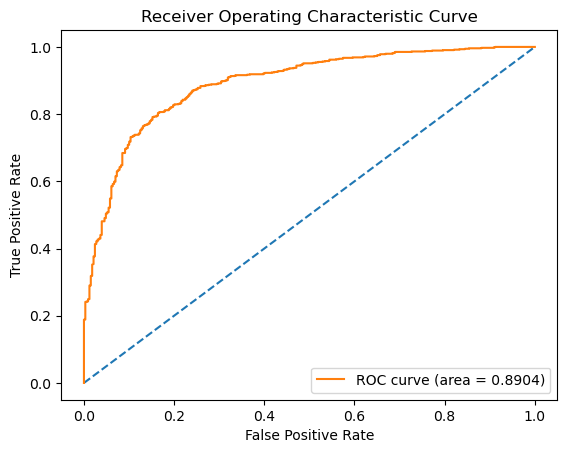

In [294]:
print('for training data')
print('--------------------------------------------------------------------')
curve_roc(bg_model, X_train, y_train)

for test data
--------------------------------------------------------------------
AUC: 0.871


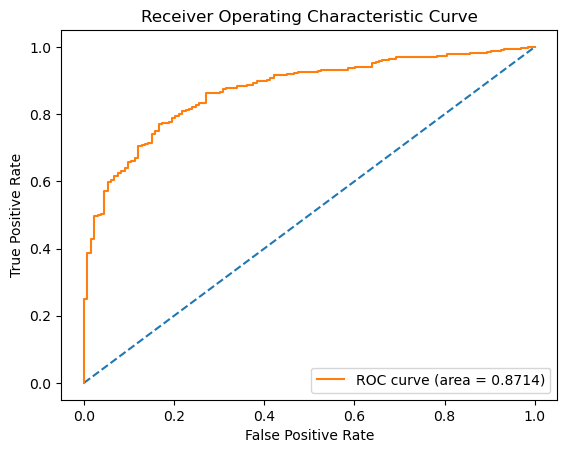

In [295]:
print('for test data')
print('--------------------------------------------------------------------')
curve_roc(bg_model, X_test, y_test)

##### Confusion Matrix

for training data
--------------------------------------------------------------------


array([[198, 131],
       [ 59, 679]], dtype=int64)

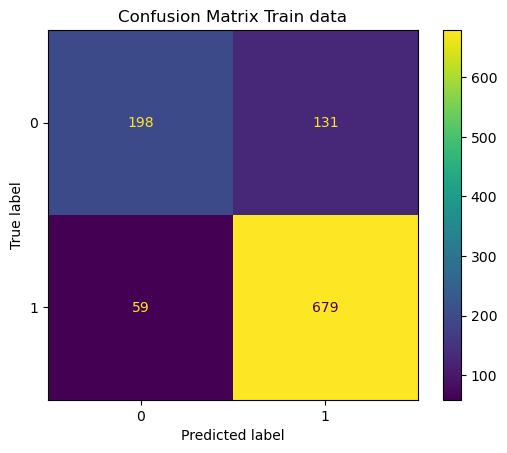



Classification report Train data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.60      0.68       329
           1       0.84      0.92      0.88       738

    accuracy                           0.82      1067
   macro avg       0.80      0.76      0.78      1067
weighted avg       0.82      0.82      0.82      1067



In [296]:
print('for training data')
print('--------------------------------------------------------------------')
classificaion_model_evaluator(bg_model, X_train, y_train, 'Train data')

for test data
--------------------------------------------------------------------


array([[ 77,  56],
       [ 27, 298]], dtype=int64)

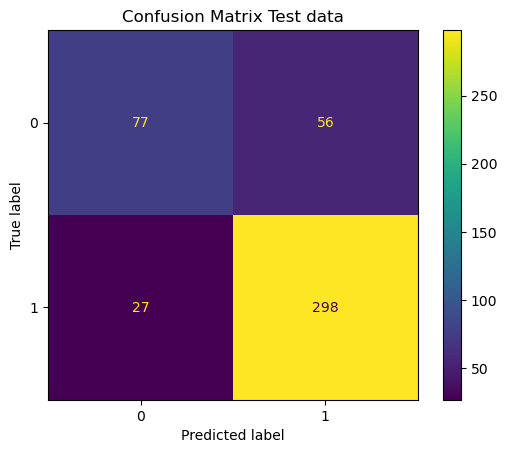



Classification report Test data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.58      0.65       133
           1       0.84      0.92      0.88       325

    accuracy                           0.82       458
   macro avg       0.79      0.75      0.76       458
weighted avg       0.81      0.82      0.81       458



In [297]:
print('for test data')
print('--------------------------------------------------------------------')
classificaion_model_evaluator(bg_model, X_test, y_test, 'Test data')

Final bagging model has on test data an AUC score of 0.87.14 meaning it has high performance and there is 87.14% chance that the model will correctly distinguish a randomly choosen instance and f1-score for class 0 (Conservative party) is 0.65 which is not very good when classifying for minority class especially for recall the score is 0.58 which is only slighly higher than a random chance.

### Ada Boosting Model

In [298]:
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [299]:
print('Model accuracy for train data')
print(ada_model.score(X_train, y_train))
print('\n Model accuracy for test data')
print(ada_model.score(X_test, y_test))

Model accuracy for train data
0.85941893158388

 Model accuracy for test data
0.8034934497816594


Tuning the model using gridsearch cv

In [384]:
# defining best parameters
best_params = {'n_estimators':[500, 1000, 1500],
               'learning_rate':[0.05,0.1,0.2]}

# defining model
grid_search = GridSearchCV(estimator=ada_model, param_grid=best_params, cv= 3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(learning_rate=0.05, n_estimators=2000,
                                          random_state=42),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'n_estimators': [500, 1000, 1500]})

In [385]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [386]:
ada_model = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1,random_state=42)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000, random_state=42)

In [387]:
print('Model accuracy for train data')
print(ada_model.score(X_train, y_train))
print('\n Model accuracy for test data')
print(ada_model.score(X_test, y_test))

Model accuracy for train data
0.8584817244611059

 Model accuracy for test data
0.8122270742358079


#### Model Evaluation
##### AUC-ROC Curve

for training data
--------------------------------------------------------------------
AUC: 0.917


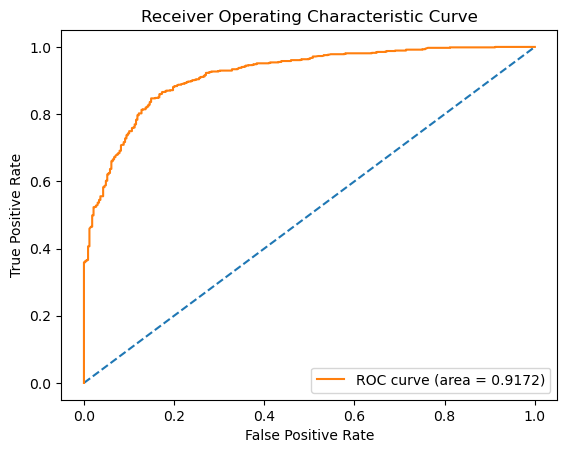

In [388]:
print('for training data')
print('--------------------------------------------------------------------')
curve_roc(ada_model, X_train, y_train)

for test data
--------------------------------------------------------------------
AUC: 0.875


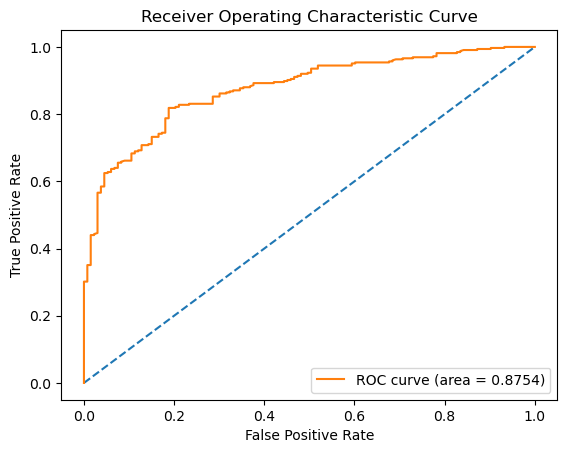

In [389]:
print('for test data')
print('--------------------------------------------------------------------')
curve_roc(ada_model, X_test, y_test)

##### Confusion Matrix

for training data
--------------------------------------------------------------------


array([[240,  89],
       [ 62, 676]], dtype=int64)

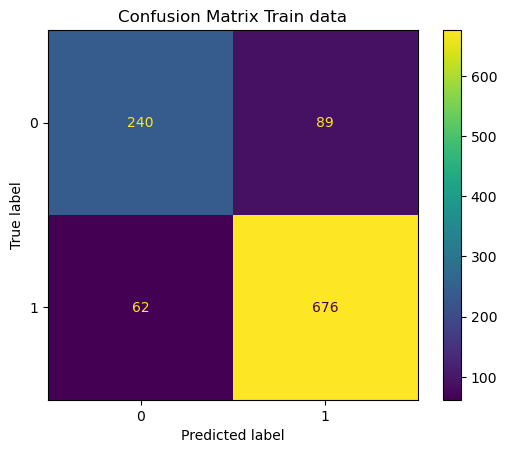



Classification report Train data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       329
           1       0.88      0.92      0.90       738

    accuracy                           0.86      1067
   macro avg       0.84      0.82      0.83      1067
weighted avg       0.86      0.86      0.86      1067



In [390]:
print('for training data')
print('--------------------------------------------------------------------')
classificaion_model_evaluator(ada_model, X_train, y_train, 'Train data')

for test data
--------------------------------------------------------------------


array([[ 87,  46],
       [ 40, 285]], dtype=int64)

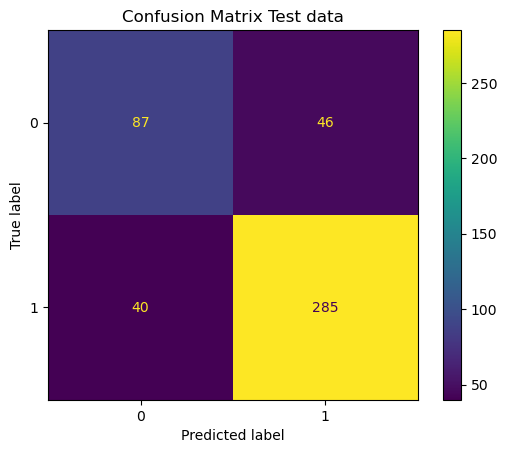



Classification report Test data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       133
           1       0.86      0.88      0.87       325

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



In [391]:
print('for test data')
print('--------------------------------------------------------------------')
classificaion_model_evaluator(ada_model, X_test, y_test, 'Test data')

Tuned ada boosting model has on test data an AUC score of 0.8754 meaning it has high performance and there is 87.54% chance that the model will correctly distingush a randomly choosen instance and f1-score for class 0 (Conservative party) is 0.67 which means model is performing weakly when classifying for minority class.

### Gradient Boosting

In [308]:
gb_model = GradientBoostingClassifier(random_state=42, )
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [309]:
print('Model accuracy for train data')
print(gb_model.score(X_train, y_train))
print('\n Model accuracy for test data')
print(gb_model.score(X_test, y_test))

Model accuracy for train data
0.8987816307403936

 Model accuracy for test data
0.8034934497816594


Tuning the model using gridsearch cv

In [376]:
# defining best parameters
best_params = {'n_estimators':[100, 150,200],
               'learning_rate':[0.05, 0.1,0.2],
               'max_depth':[1,2,3,4],
               'max_features':[0.2,0.3,0.4]}

# defining model
grid_search = GridSearchCV(estimator=gb_model, param_grid=best_params, cv= 3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=2, max_features=0.2,
                                                  n_estimators=150,
                                                  random_state=42),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [1, 2, 3, 4],
                         'max_features': [0.2, 0.3, 0.4],
                         'n_estimators': [100, 150, 200]})

In [377]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'max_features': 0.2,
 'n_estimators': 150}

In [378]:
gb_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=2, max_features=0.2, n_estimators=150,random_state=42, )
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, max_features=0.2, n_estimators=150,
                           random_state=42)

In [379]:
print('Model accuracy for train data')
print(gb_model.score(X_train, y_train))
print('\n Model accuracy for test data')
print(gb_model.score(X_test, y_test))

Model accuracy for train data
0.8697282099343955

 Model accuracy for test data
0.8187772925764192


#### Model Evaluation
##### AUC-ROC Curve

for training data
--------------------------------------------------------------------
AUC: 0.926


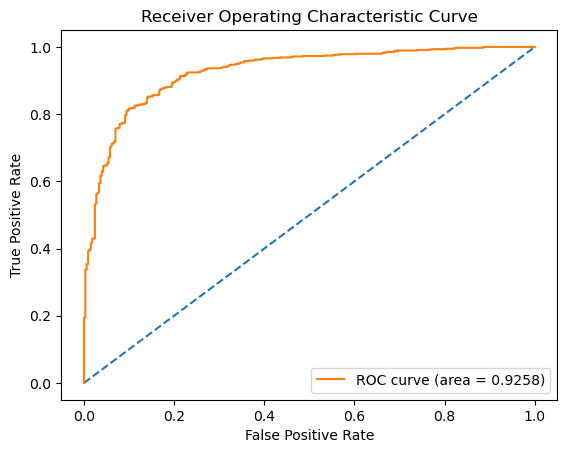

In [380]:
print('for training data')
print('--------------------------------------------------------------------')
curve_roc(gb_model, X_train, y_train)

for test data
--------------------------------------------------------------------
AUC: 0.881


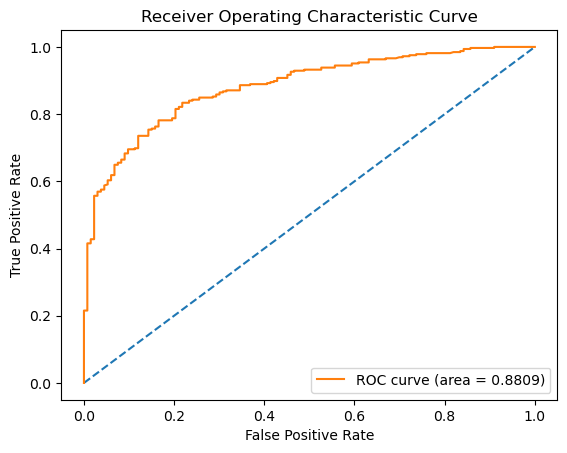

In [381]:
print('for test data')
print('--------------------------------------------------------------------')
curve_roc(gb_model, X_test, y_test)

#### Confusion Matrix

for training data
--------------------------------------------------------------------


array([[246,  83],
       [ 56, 682]], dtype=int64)

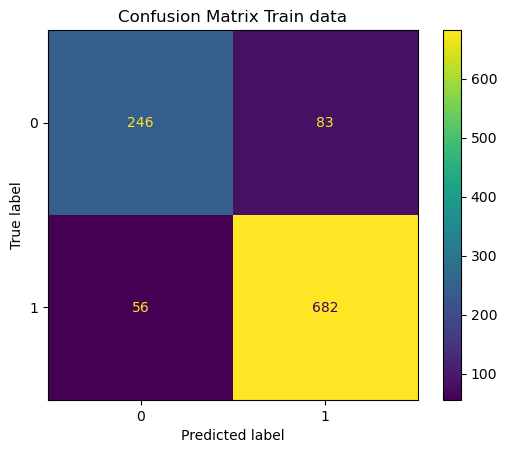



Classification report Train data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       329
           1       0.89      0.92      0.91       738

    accuracy                           0.87      1067
   macro avg       0.85      0.84      0.84      1067
weighted avg       0.87      0.87      0.87      1067



In [382]:
print('for training data')
print('--------------------------------------------------------------------')
classificaion_model_evaluator(gb_model, X_train, y_train, 'Train data')

for test data
--------------------------------------------------------------------


array([[ 87,  46],
       [ 37, 288]], dtype=int64)

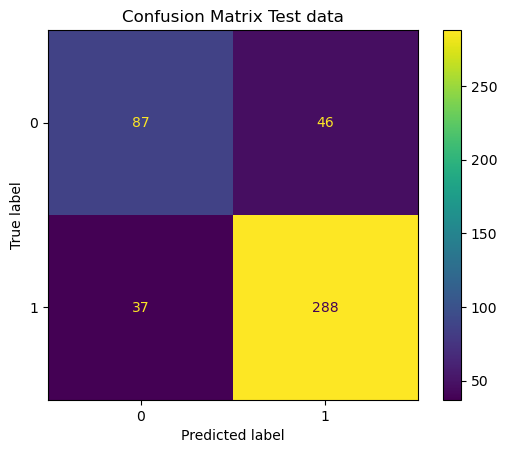



Classification report Test data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       133
           1       0.86      0.89      0.87       325

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [383]:
print('for test data')
print('--------------------------------------------------------------------')
classificaion_model_evaluator(gb_model, X_test, y_test, 'Test data')

Tuned gradient boosting model has on test data an AUC score of 0.881 meaning it has high performance and there is 88.1% chance that the model will correctly distingush a randomly choosen instance and f1-score for class 0 (Conservative party) is 0.68 which means model is performing weakly when classifying for minority class.

## Model Comparision

In [392]:
# creating a dataframe with model accuracy and AUC score for test and train data
train_score = []
test_score = []
auc_Score_train = []
auc_Score_test = []
models = [NB_model, knn_model, rf_model, bg_model, ada_model, gb_model]
for model in models:
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_s = model.score(X_train, y_train)
    test_s = model.score(X_test, y_test)
    # predict probabilities
    probs_train = model.predict_proba(X_train)
    # keep probabilities for the positive outcome only
    probs_train = probs_train[:, 1]
    # calculate AUC
    auc_train = roc_auc_score(y_train, probs_train)
    # predict probabilities
    probs_test = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs_test = probs_test[:, 1]
    # calculate AUC
    auc_test = roc_auc_score(y_test, probs_test)
    train_score.append(train_s)
    test_score.append(test_s)
    auc_Score_train.append(auc_train)
    auc_Score_test.append(auc_test)

index = ['Naive Bayes Model', 'KNN Model', 'Random Forest Model', 'Bagging Model', 
         'ADA Boosting Model', 'Gradient Boosting Model']
compare_df = pd.DataFrame({'Train data score': train_score, 'Test data score': test_score, 
                           'AUC score train data': auc_Score_train, 'AUC score test data': auc_Score_test},
                          index = index)

In [393]:
# printing dataframe after sorting in descending order of AUC score
compare_df.sort_values(by = 'AUC score test data', ascending = False)

,Train data score,Test data score,AUC score train data,AUC score test data
Random Forest Model,0.880975,0.820961,0.940641,0.884118
Gradient Boosting Model,0.869728,0.818777,0.925820,0.880937
ADA Boosting Model,0.858482,0.812227,0.917216,0.875361
Bagging Model,0.821931,0.818777,0.890419,0.871394
Naive Bayes Model,0.837863,0.814410,0.891535,0.866767
KNN Model,0.859419,0.772926,0.929247,0.832354


Based on the above table, we can conclude that when comparing models by AUC score for the test set, random forest model is performing the best with an AUC score of 0.8841. This indicates that the random forest model has a superior ability to distinguish between classes, making it the most effective model for our classification task. We will check for the most important features which play crucial role in distinguishing between classes.
## Important Features

In [394]:
feature_importance = pd.DataFrame(rf_model.feature_importances_.transpose(), columns = ['imp'], index = X_train.columns)
feature_importance.sort_values(by = 'imp', ascending=False)

,imp
Hague,0.291610
Blair,0.235054
Europe,0.191686
Political.knowledge,0.105977
Age,0.081862
Economic.cond.national,0.061651
Economic.cond.household,0.024827
Gender,0.007334


From the above table we can conclude that as we had anticipated features 'Hague' and 'Blair' are the most important features in classification followed by 'Europe' which records how Eurosceptic a person is. 

In [321]:
# checking the model performance if only 'Hague' and 'Blair' are provided for prediction
x = election_dataV1[['Hague','Blair']]
y = election_dataV1['Vote']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [322]:
x_train.head()

,Hague,Blair
1372,2,4
126,4,4
327,4,2
292,2,4
1058,2,4


In [396]:
# for train data
rf_model.fit(x_train, y_train)
print('Model accuracy for train data')
print(rf_model.score(x_train, y_train))
print('AUC score for train data')
# predict probabilities
probs_train = rf_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
auc_train = roc_auc_score(y_train, probs_train)
print(auc_train)

# for test data
print('\n Model accuracy for test data')
print(rf_model.score(x_test, y_test))
print('AUC score for test data')
# predict probabilities
probs_test = rf_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# calculate AUC
auc_test = roc_auc_score(y_test, probs_test)
print(auc_test)

Model accuracy for train data
0.8116213683223993
AUC score for train data
0.8601205920873799

 Model accuracy for test data
0.7947598253275109
AUC score for test data
0.836043956043956


## Conclusion
1. For the current election, the most important factor is the candidate where a voter is more likely to vote for the candidate for whom they have a favourable view. Infact just by taking columns 'Hague' and 'Blair' we can build a model with an accuracy of 0.7947 and AUC score of 0.836 which is only couple of points lower than the overall model scores.
2. On comparing different models by their AUC scores we find that Random Forest model is performing the best with a score of 0.8841 on test data meaning there is 88.41% chance that the model will correctly distingush a randomly choosen instance. We have used AUC score as a key metric to select the best performing model because AUC score is a robust measure for skewed data as it accounts for both the true positive rate and the false positive rate. It provides a single metric that summarizes the model’s ability to distinguish between classes across all thresholds.
3. Key takeaways from EDA:
* Based on the EDA, we found that voters had a clear preference for candidates, as reflected in the ratings they gave to both candidates. This clarity significantly aided in prediction, with 'Hague' and 'Blair' emerging as the most influential features impacting the outcome.
* Another important factor was Europe where from EDA we found that voters who are more Eurosceptic are more likely to vote for the Conservative party.
* The median age of voters for Conservative party is higher than that for Labour party meaning older people are more likely to vote for the Conservative party.
4. While we successfully built and selected the best-performing predictive model with approximately 82% accuracy and an AUC score of 88%, there is potential for further improvement. By expanding the sample to include more features that clearly capture a voter’s preference, similar to the features 'Hague' and 'Blair', we can enhance the model’s performance. Additionally, recording which factors are most important to voters—such as candidate preference, Europe, or economic factors—would allow us to assign weights to each factor, thereby refining our model further.

# Problem 2
## Business Context
To analyse the speeches of three different Presidents of the United States and find the most frequent words used which might give us the understanding of their priorities and provide some insight into their policy making.
## Problem Statement
The objective of this analysis is to study speeches for three different Presidents of the United States belonging from three different decades and find the most common words used by each of them in these speeches.
## Uploading Data

In [324]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
roosevelt_text = inaugural.raw('1941-Roosevelt.txt')
kennedy_text = inaugural.raw('1961-Kennedy.txt')
nixon_text = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\piyus\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


## Data Overview

In [325]:
print(roosevelt_text)

On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.

In Washington's day the task of the people was to create and weld together a nation.

In Lincoln's day the task of the people was to preserve that Nation from disruption from within.

In this day the task of the people is to save that Nation and its institutions from disruption from without.

To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.

Lives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.

There are men who doubt this. There are men who believe that democracy, as a form 

In [326]:
# number of characters in each speech
print('Number of characters in each speech')
print(f"Number of characters in 1941 speech of Roosevelt: {len(inaugural.raw('1941-Roosevelt.txt'))}")
print(f"Number of characters in 1961 speech of Kennedy: {len(inaugural.raw('1961-Kennedy.txt'))}")  
print(f"Number of characters in 1973 speech of Nixon: {len(inaugural.raw('1973-Nixon.txt'))}")  

Number of characters in each speech
Number of characters in 1941 speech of Roosevelt: 7571
Number of characters in 1961 speech of Kennedy: 7618
Number of characters in 1973 speech of Nixon: 9991


We have character count for each of the speeches which we will present in a visualized manner.

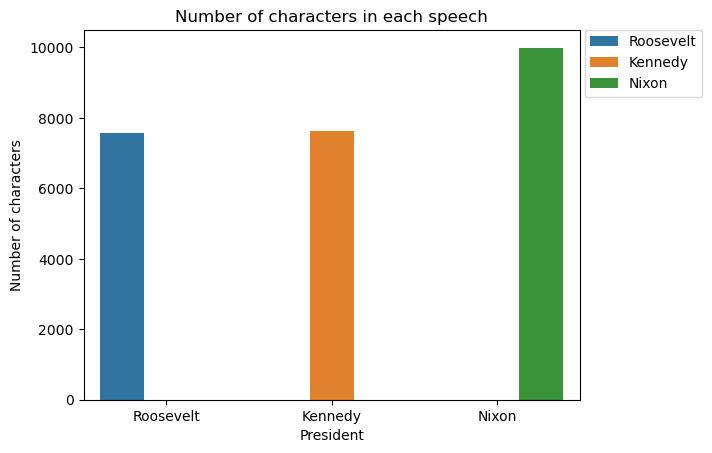

In [327]:
# plotting character length
char_len=[7571,7618,9991]
president=['Roosevelt','Kennedy','Nixon']
sns.barplot(x = president, y=char_len, hue=president)
plt.xlabel('President')
plt.ylabel('Number of characters')
plt.title('Number of characters in each speech')
plt.legend(loc = (1.01,0.82))
plt.show()

In [328]:
# Number of words in each speech
print('Number of words in each speech')
print(f"Number of words in 1941 speech of Roosevelt: {len(inaugural.words('1941-Roosevelt.txt'))}")
print(f"Number of words in 1961 speech of Kennedy: {len(inaugural.words('1961-Kennedy.txt'))}")  
print(f"Number of words in 1973 speech of Nixon: {len(inaugural.words('1973-Nixon.txt'))}")  

Number of words in each speech
Number of words in 1941 speech of Roosevelt: 1536
Number of words in 1961 speech of Kennedy: 1546
Number of words in 1973 speech of Nixon: 2028


We have word count for each of the speeches which we will present in a visualized manner.

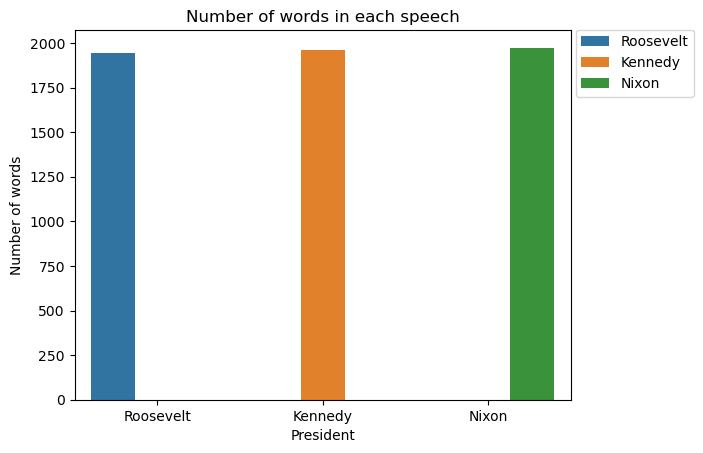

In [329]:
word_len=[1941,1961,1973]
president=['Roosevelt','Kennedy','Nixon']
sns.barplot(x = president, y=word_len, hue=president)
plt.xlabel('President')
plt.ylabel('Number of words')
plt.title('Number of words in each speech')
plt.legend(loc = (1.01,0.82))
plt.show()

In [330]:
# Number of sentences in each speech
print('Number of sentences in each speech')
print(f"Number of sentences in 1941 speech of Roosevelt: {len(inaugural.sents('1941-Roosevelt.txt'))}")
print(f"Number of sentences in 1961 speech of Kennedy: {len(inaugural.sents('1961-Kennedy.txt'))}")  
print(f"Number of sentences in 1973 speech of Nixon: {len(inaugural.sents('1973-Nixon.txt'))}")  

Number of sentences in each speech
Number of sentences in 1941 speech of Roosevelt: 68
Number of sentences in 1961 speech of Kennedy: 52
Number of sentences in 1973 speech of Nixon: 69


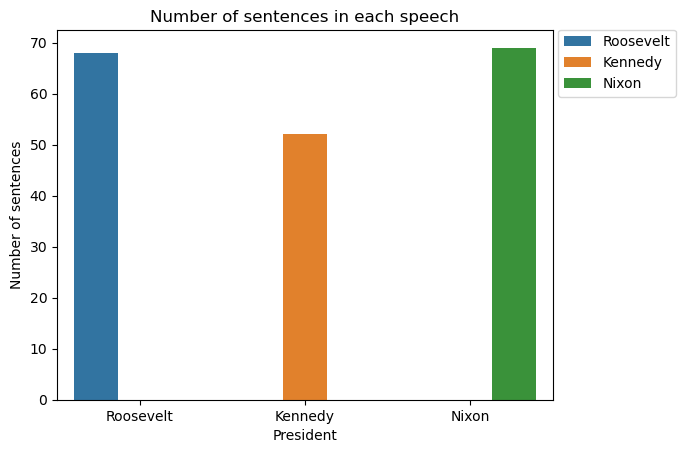

In [331]:
sent_len=[68,52,69]
president=['Roosevelt','Kennedy','Nixon']
sns.barplot(x = president, y=sent_len, hue=president)
plt.xlabel('President')
plt.ylabel('Number of sentences')
plt.title('Number of sentences in each speech')
plt.legend(loc = (1.01,0.82))
plt.show()

While as per character and word count President Nixon has used significantly more words and characters, number of sentences used by both President Roosevelt and President Nixon are almost same which has been better represented in a visualized manner.

## Text Cleaning

### Tokenizing words

In [332]:
# saving segregated words in a list
roosevelt_words=inaugural.words('1941-Roosevelt.txt')
kennedy_words = inaugural.words('1961-Kennedy.txt')
nixon_words = inaugural.words('1973-Nixon.txt')
nixon_words

['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', ...]

### Converting words to lower case

In [333]:
def convert_lower(words, lower_words):
    lower_words.extend([word.lower() for word in words])

In [334]:
# Convert words to lowercase
roosevelt_lower = []
convert_lower(roosevelt_words, roosevelt_lower)
roosevelt_lower

['on',
 'each',
 'national',
 'day',
 'of',
 'inauguration',
 'since',
 '1789',
 ',',
 'the',
 'people',
 'have',
 'renewed',
 'their',
 'sense',
 'of',
 'dedication',
 'to',
 'the',
 'united',
 'states',
 '.',
 'in',
 'washington',
 "'",
 's',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'create',
 'and',
 'weld',
 'together',
 'a',
 'nation',
 '.',
 'in',
 'lincoln',
 "'",
 's',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'preserve',
 'that',
 'nation',
 'from',
 'disruption',
 'from',
 'within',
 '.',
 'in',
 'this',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'is',
 'to',
 'save',
 'that',
 'nation',
 'and',
 'its',
 'institutions',
 'from',
 'disruption',
 'from',
 'without',
 '.',
 'to',
 'us',
 'there',
 'has',
 'come',
 'a',
 'time',
 ',',
 'in',
 'the',
 'midst',
 'of',
 'swift',
 'happenings',
 ',',
 'to',
 'pause',
 'for',
 'a',
 'moment',
 'and',
 'take',
 'stock',
 '--',
 'to',
 'recall',
 'what',
 'our',
 'place',
 'in'

In [335]:
# Convert words to lowercase
kennedy_lower = []
convert_lower(kennedy_words, kennedy_lower)
kennedy_lower

['vice',
 'president',
 'johnson',
 ',',
 'mr',
 '.',
 'speaker',
 ',',
 'mr',
 '.',
 'chief',
 'justice',
 ',',
 'president',
 'eisenhower',
 ',',
 'vice',
 'president',
 'nixon',
 ',',
 'president',
 'truman',
 ',',
 'reverend',
 'clergy',
 ',',
 'fellow',
 'citizens',
 ',',
 'we',
 'observe',
 'today',
 'not',
 'a',
 'victory',
 'of',
 'party',
 ',',
 'but',
 'a',
 'celebration',
 'of',
 'freedom',
 '--',
 'symbolizing',
 'an',
 'end',
 ',',
 'as',
 'well',
 'as',
 'a',
 'beginning',
 '--',
 'signifying',
 'renewal',
 ',',
 'as',
 'well',
 'as',
 'change',
 '.',
 'for',
 'i',
 'have',
 'sworn',
 'i',
 'before',
 'you',
 'and',
 'almighty',
 'god',
 'the',
 'same',
 'solemn',
 'oath',
 'our',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'a',
 'century',
 'and',
 'three',
 'quarters',
 'ago',
 '.',
 'the',
 'world',
 'is',
 'very',
 'different',
 'now',
 '.',
 'for',
 'man',
 'holds',
 'in',
 'his',
 'mortal',
 'hands',
 'the',
 'power',
 'to',
 'abolish',
 'all',
 'forms',
 'of',
 

In [336]:
# Convert words to lowercase
nixon_lower = []
convert_lower(nixon_words, nixon_lower)
nixon_lower

['mr',
 '.',
 'vice',
 'president',
 ',',
 'mr',
 '.',
 'speaker',
 ',',
 'mr',
 '.',
 'chief',
 'justice',
 ',',
 'senator',
 'cook',
 ',',
 'mrs',
 '.',
 'eisenhower',
 ',',
 'and',
 'my',
 'fellow',
 'citizens',
 'of',
 'this',
 'great',
 'and',
 'good',
 'country',
 'we',
 'share',
 'together',
 ':',
 'when',
 'we',
 'met',
 'here',
 'four',
 'years',
 'ago',
 ',',
 'america',
 'was',
 'bleak',
 'in',
 'spirit',
 ',',
 'depressed',
 'by',
 'the',
 'prospect',
 'of',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'and',
 'of',
 'destructive',
 'conflict',
 'at',
 'home',
 '.',
 'as',
 'we',
 'meet',
 'here',
 'today',
 ',',
 'we',
 'stand',
 'on',
 'the',
 'threshold',
 'of',
 'a',
 'new',
 'era',
 'of',
 'peace',
 'in',
 'the',
 'world',
 '.',
 'the',
 'central',
 'question',
 'before',
 'us',
 'is',
 ':',
 'how',
 'shall',
 'we',
 'use',
 'that',
 'peace',
 '?',
 'let',
 'us',
 'resolve',
 'that',
 'this',
 'era',
 'we',
 'are',
 'about',
 'to',
 'enter',
 'will',
 'not',
 'be',
 '

### Removing Stopwords and Punctuations and Stemming the words

In [337]:
# assigning stop words and punctuation to a variable and defining the stemmer
stopwords = nltk.corpus.stopwords.words('english')+list(string.punctuation)
additional_unwanted = {'--', '``', "''", 'mr', 'mrs','miss', 'l','ii','...','."'}
stopwords.extend(additional_unwanted)
stemmer = nltk.SnowballStemmer('english')

In [338]:
# defining a function to clean the text and stem the words
def clean(words, clean_words):
    for word in words:
        if word not in stopwords and not word.isdigit():
            clean_words.append(stemmer.stem(word))

In [339]:
#cleaning the words
roosevelt_words_clean = []
clean(roosevelt_lower, roosevelt_words_clean)
roosevelt_words_clean = [re.sub('[^a-z\s]', '', word) for word in roosevelt_words_clean]
roosevelt_words_clean[:25]

['nation',
 'day',
 'inaugur',
 'sinc',
 'peopl',
 'renew',
 'sens',
 'dedic',
 'unit',
 'state',
 'washington',
 'day',
 'task',
 'peopl',
 'creat',
 'weld',
 'togeth',
 'nation',
 'lincoln',
 'day',
 'task',
 'peopl',
 'preserv',
 'nation',
 'disrupt']

In [340]:
#cleaning the words
kennedy_words_clean = []
clean(kennedy_lower, kennedy_words_clean)
kennedy_words_clean = [re.sub('[^a-z\s]', '', word) for word in kennedy_words_clean]
kennedy_words_clean[:25]

['vice',
 'presid',
 'johnson',
 'speaker',
 'chief',
 'justic',
 'presid',
 'eisenhow',
 'vice',
 'presid',
 'nixon',
 'presid',
 'truman',
 'reverend',
 'clergi',
 'fellow',
 'citizen',
 'observ',
 'today',
 'victori',
 'parti',
 'celebr',
 'freedom',
 'symbol',
 'end']

In [341]:
#cleaning the words
nixon_words_clean = []
clean(nixon_lower, nixon_words_clean)
nixon_words_clean = [re.sub('[^a-z\s]', '', word) for word in nixon_words_clean]
nixon_words_clean[:25]

['vice',
 'presid',
 'speaker',
 'chief',
 'justic',
 'senat',
 'cook',
 'eisenhow',
 'fellow',
 'citizen',
 'great',
 'good',
 'countri',
 'share',
 'togeth',
 'met',
 'four',
 'year',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depress',
 'prospect',
 'seem']

## Frequency Count

In [342]:
print('Top 3 words used by President Roosevelt in speech of 1941')
roosevelt_freq = nltk.FreqDist(roosevelt_words_clean)
roosevelt_freq.most_common(3)

Top 3 words used by President Roosevelt in speech of 1941


[('nation', 17), ('know', 10), ('peopl', 9)]

In [343]:
print('Top 3 words used by President Kennedy in speech of 1961')
kennedy_freq = nltk.FreqDist(kennedy_words_clean)
kennedy_freq.most_common(3)

Top 3 words used by President Kennedy in speech of 1961


[('let', 16), ('us', 12), ('power', 9)]

In [344]:
print('Top 3 words used by President Nixon in speech of 1973')
nixon_freq = nltk.FreqDist(nixon_words_clean)
nixon_freq.most_common(3)

Top 3 words used by President Nixon in speech of 1973


[('us', 26), ('let', 22), ('america', 21)]

## Wordcloud
### Roosevelt 1941

In [345]:
from wordcloud import WordCloud,STOPWORDS

In [346]:
roosevelt_speech = ' '.join(roosevelt_words_clean)

In [347]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(roosevelt_speech)

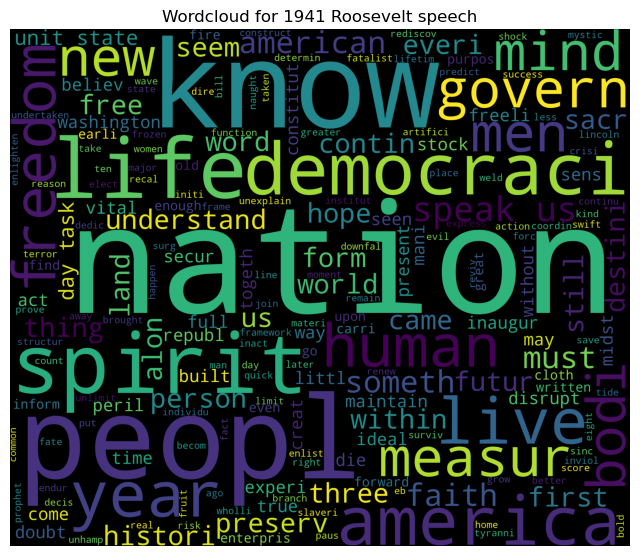

In [348]:
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordcloud for 1941 Roosevelt speech')
plt.show()

### Kennedy 1961

In [349]:
kennedy_speech = ' '.join(kennedy_words_clean)

In [350]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(kennedy_speech)

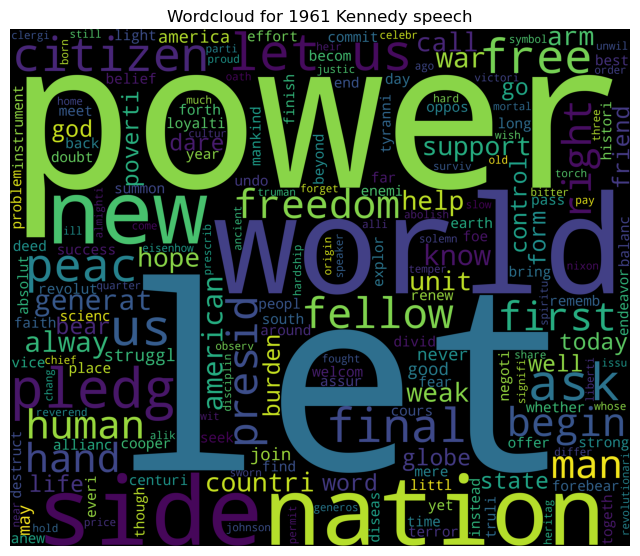

In [351]:
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordcloud for 1961 Kennedy speech')
plt.show()

### Nixon 1973

In [352]:
nixon_speech = ' '.join(nixon_words_clean)

In [353]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(nixon_speech)

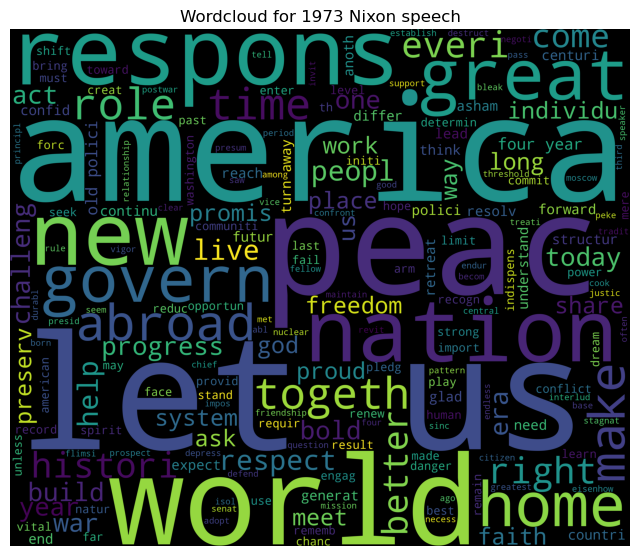

In [354]:
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordcloud for 1973 Nixon speech')
plt.show()

## Key Takeaway
The word clouds generated for this text analysis project provide valuable insights into the evolving priorities of U.S. presidents across different decades. In 1941, President Roosevelt's speeches prominently featured words such as 'Nation,' 'Democracy,' and 'Freedom,' reflecting the focus on national unity and democratic values during that era. By 1961, under President Kennedy, the emphasis shifted towards 'World' and 'Power,' indicating a broader international perspective and the geopolitical dynamics of the Cold War. By 1971, President Nixon's speeches highlighted words like 'Peace' and 'Response,' signalling a focus on achieving peace and addressing immediate national and international challenges. These changes in word usage underscore how presidential rhetoric adapts to the prevailing political, social, and global contexts of their respective times. and can be extremely helpful in predicting countries future policies and future course of action.